In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Loading data
gdpFullDf = pd.read_csv('CleanedData/gdp_per_hour_worked_filtered.csv', index_col=0)
happinessFullDf = pd.read_csv('CleanedData/WorldHappinessReport_FilteredCountriesAndYears.csv', index_col=0)
gdpFullDf.reset_index(drop=True, inplace=True)
happinessFullDf.reset_index(drop=True, inplace=True)

In [3]:
gdpFullDf.columns

Index(['year', 'iso3c', 'country', 'pop', 'labor_force', 'gdp_ppp_c',
       'gdp_ppp', 'gdp', 'gdp_c', 'hours_worked', 'total_hours',
       'hours_per_employed', 'gdp_over_k_hours_worked',
       'gdp_ppp_over_k_hours_worked', 'gdp_over_pop', 'gdp_ppp_over_pop',
       'gdp_ppp_over_labor_force', 'gdp_ppp_over_pop_c', 'gdp_over_pop_c',
       'gdp_ppp_over_k_hours_worked_c', 'continent',
       'penn_hours_worked_over_pop', 'hours_worked_over_pop',
       'hours_worked_over_pop_combined', 'hours_worked_over_pop_predicted',
       'hours_worked_over_pop_modelled'],
      dtype='object')

In [4]:
# Creating columnn for gdp over labor force to match the column in the original article
gdpFullDf['gdp_over_labor_force'] = gdpFullDf['gdp'] / gdpFullDf['labor_force']

In [5]:
happinessFullDf.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0    Australia  2007        7.285              10.694           0.965   
1    Australia  2008        7.254              10.709           0.947   
2    Australia  2010        7.450              10.714           0.955   
3    Australia  2011        7.406              10.723           0.967   
4    Australia  2012        7.196              10.744           0.945   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             69.96                         0.891       0.343   
1                             70.04                         0.916       0.302   
2                             70.20                         0.932       0.313   
3                             70.28                         0.945       0.366   
4                             70.36                         0.935       0.270   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.513            0.762            0.215  
1                      0.431            0.729            0.218  
2                      0.366            0.762            0.220  
3                      0.382            0.724            0.195  
4                      0.368            0.728            0.214

In [6]:
# Correlation between country happiness and gdp in each year compared to other countries & country and its own gdp across years
# One year (2022) to evaluate across all countries, then split countries into their own DFs and make evaluations for each (yikes)

In [7]:
Gdp2022 = gdpFullDf[['year', 'iso3c', 'country', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 'gdp_ppp_over_k_hours_worked_c']]
Happ2022 = happinessFullDf[['Country name', 'year', 'Life Ladder', 'Freedom to make life choices']]

In [8]:
# Checkin out which country names are different between the data frames
happinessFullDf[~(happinessFullDf['Country name'].isin(gdpFullDf['country'].unique()))]['Country name'].unique()

array(['Slovakia', 'South Korea'], dtype=object)

In [9]:
Gdp2022['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Switzerland',
       'Czechia', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland',
       'France', 'United Kingdom', 'Greece', 'Croatia', 'Hungary',
       'Iceland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Lithuania',
       'Luxembourg', 'Latvia', 'Netherlands', 'Norway', 'New Zealand',
       'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Sweden',
       'United States'], dtype=object)

In [10]:

Gdp2022['country'] = np.where(Gdp2022['country'] == 'Slovak Republic', 'Slovakia', Gdp2022['country'])
Gdp2022['country'] = np.where(Gdp2022['country'] == 'Korea, Rep.', 'South Korea', Gdp2022['country'])

/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_91132/1749248213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gdp2022['country'] = np.where(Gdp2022['country'] == 'Slovak Republic', 'Slovakia', Gdp2022['country'])
/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_91132/1749248213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gdp2022['country'] = np.where(Gdp2022['country'] == 'Korea, Rep.', 'South Korea', Gdp2022['country'])


In [11]:
GdpSelectColumnsGdp2022 = Gdp2022[Gdp2022['year'] == 2022]
Happ2022 = Happ2022[Happ2022['year'] == 2022]

In [12]:
# Checking that their country names match 
Happ2022[~(Happ2022['Country name'].isin(Gdp2022['country'].unique()))]['Country name'].unique()

array([], dtype=object)

In [13]:
Happ2022.rename({'Country name': 'country'}, axis=1, inplace=True)

In [14]:
Gdp2022.reset_index(drop=True, inplace=True)
Happ2022.reset_index(drop=True, inplace=True)

In [15]:
HappAndGdp2022 = pd.merge(Happ2022, Gdp2022, on='country')

In [16]:
HappAndGdp2022 = HappAndGdp2022.drop(['year_x'], axis=1)

In [17]:
HappAndGdp2022.rename(columns={'year_y': 'year'})

country  Life Ladder  Freedom to make life choices  year iso3c  \
0        Australia        7.035                         0.854  2007   AUS   
1        Australia        7.035                         0.854  2008   AUS   
2        Australia        7.035                         0.854  2009   AUS   
3        Australia        7.035                         0.854  2010   AUS   
4        Australia        7.035                         0.854  2011   AUS   
..             ...          ...                           ...   ...   ...   
507  United States        6.693                         0.736  2018   USA   
508  United States        6.693                         0.736  2019   USA   
509  United States        6.693                         0.736  2020   USA   
510  United States        6.693                         0.736  2021   USA   
511  United States        6.693                         0.736  2022   USA   

     gdp_over_labor_force  gdp_ppp_over_labor_force  \
0            78120.920741              69751.995589   
1            94016.234615              70998.405750   
2            80948.562765              76214.185930   
3            98495.003196              74370.535590   
4           118090.519994              79265.902613   
..                    ...                       ...   
507         124211.655102             124211.655102   
508         127952.787164             127952.787164   
509         127144.792578             127144.792578   
510         140291.829947             140291.829947   
511         150462.830076             150462.830076   

     gdp_ppp_over_k_hours_worked_c  
0                     47828.591243  
1                     50302.298232  
2                     49719.834682  
3                     50413.096897  
4                     50256.888884  
..                             ...  
507                   72728.726786  
508                   73609.592815  
509                   76117.762449  
510                   77024.144158  
511                   76150.654655  

[512 rows x 8 columns]

In [18]:
HappAndGdp2022[['Life Ladder', 'gdp_over_labor_force']].corr()

Life Ladder  gdp_over_labor_force
Life Ladder              1.000000              0.566082
gdp_over_labor_force     0.566082              1.000000

In [19]:
HappAndGdp2022[['Life Ladder', 'gdp_ppp_over_k_hours_worked_c']].corr()

Life Ladder  gdp_ppp_over_k_hours_worked_c
Life Ladder                       1.000000                       0.575585
gdp_ppp_over_k_hours_worked_c     0.575585                       1.000000

In [20]:
HappAndGdp2022[['Life Ladder', 'gdp_ppp_over_labor_force']].corr()

Life Ladder  gdp_ppp_over_labor_force
Life Ladder                  1.000000                  0.419039
gdp_ppp_over_labor_force     0.419039                  1.000000

In [21]:
GdpSelectColumns = gdpFullDf[['year', 'iso3c', 'country', 'gdp_over_labor_force', 'gdp_ppp_over_labor_force', 'gdp_ppp_over_k_hours_worked_c']]
HappinessSelectColumns = happinessFullDf[['Country name', 'year', 'Life Ladder', 'Freedom to make life choices']]

In [22]:
GdpSelectColumns['country'] = np.where(GdpSelectColumns['country'] == 'Slovak Republic', 'Slovakia', GdpSelectColumns['country'])
GdpSelectColumns['country'] = np.where(GdpSelectColumns['country'] == 'Korea, Rep.', 'South Korea', GdpSelectColumns['country'])

/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_91132/3972727114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GdpSelectColumns['country'] = np.where(GdpSelectColumns['country'] == 'Slovak Republic', 'Slovakia', GdpSelectColumns['country'])
/var/folders/gm/cwd29txd7sg1tqmgzvg2jj580000gn/T/ipykernel_91132/3972727114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GdpSelectColumns['country'] = np.where(GdpSelectColumns['country'] == 'Korea, Rep.', 'South Korea', GdpSelectColumns['country'

In [23]:
HappinessSelectColumns = HappinessSelectColumns.rename(columns={'Country name': 'country'})

In [24]:
HappinessAndGdp = pd.merge(GdpSelectColumns, HappinessSelectColumns, on=['country', 'year'])

In [25]:
HappinessAndGdp

year iso3c        country  gdp_over_labor_force  \
0    2007   AUS      Australia          78120.920741   
1    2007   BEL        Belgium          99585.047912   
2    2007   CAN         Canada          79902.764984   
3    2007   CZE        Czechia          36654.903469   
4    2007   DEU        Germany          81831.734844   
..    ...   ...            ...                   ...   
477  2022   POL         Poland          37027.667633   
478  2022   PRT       Portugal          47631.902812   
479  2022   SVN       Slovenia          58579.010020   
480  2022   SWE         Sweden         104619.645810   
481  2022   USA  United States         150462.830076   

     gdp_ppp_over_labor_force  gdp_ppp_over_k_hours_worked_c  Life Ladder  \
0                69751.995589                   47828.591243        7.285   
1                82680.171532                   73741.553706        7.219   
2                70805.734407                   50845.133236        7.482   
3                52175.331212                   38682.898921        6.500   
4                71321.753851                   66168.565867        6.417   
..                        ...                            ...          ...   
477              87446.574569                   45112.670255        6.666   
478              81337.120926                   44805.232401        5.953   
479              99492.983288                   50930.025561        6.723   
480             120919.625775                   76795.931188        7.431   
481             150462.830076                   76150.654655        6.693   

     Freedom to make life choices  
0                           0.891  
1                           0.901  
2                           0.930  
3                           0.799  
4                           0.801  
..                            ...  
477                         0.800  
478                         0.903  
479                         0.930  
480                         0.939  
481                         0.736  

[482 rows x 8 columns]

In [26]:
HappinessAndGdp.rename(columns={'year':'Year', 'gdp_over_labor_force':'GDP per Worker', 'gdp_ppp_over_labor_force':'GDP PPP per Worker', 
                                'gdp_ppp_over_k_hours_worked_c':'PPP per Hour Worked', 'Life Ladder':'Happiness Index', 'Freedom to make life choices':'Freedom to Make Life Choices'}, inplace=True)
HappinessAndGdp.head()

Year iso3c    country  GDP per Worker  GDP PPP per Worker  \
0  2007   AUS  Australia    78120.920741        69751.995589   
1  2007   BEL    Belgium    99585.047912        82680.171532   
2  2007   CAN     Canada    79902.764984        70805.734407   
3  2007   CZE    Czechia    36654.903469        52175.331212   
4  2007   DEU    Germany    81831.734844        71321.753851   

   PPP per Hour Worked  Happiness Index  Freedom to Make Life Choices  
0         47828.591243            7.285                         0.891  
1         73741.553706            7.219                         0.901  
2         50845.133236            7.482                         0.930  
3         38682.898921            6.500                         0.799  
4         66168.565867            6.417                         0.801

<Axes: xlabel='GDP per Worker', ylabel='Happiness Index'>

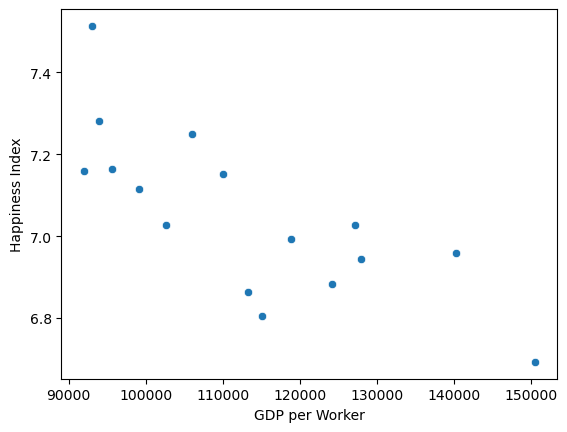

In [70]:
sns.scatterplot(data=HappinessAndGdp[HappinessAndGdp['iso3c'] == 'USA'], x='GDP per Worker', y='Happiness Index')

In [71]:
HappinessAndGdp[HappinessAndGdp['iso3c'] == 'USA'][['GDP per Worker', 'Happiness Index']].corr()

GDP per Worker  Happiness Index
GDP per Worker         1.000000        -0.762711
Happiness Index       -0.762711         1.000000

<Axes: xlabel='Year', ylabel='GDP per Worker'>

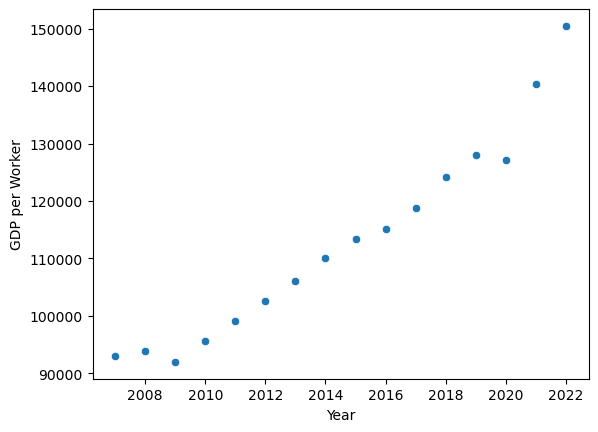

In [72]:
sns.scatterplot(data=HappinessAndGdp[HappinessAndGdp['iso3c'] == 'USA'], x='Year', y='GDP per Worker')

In [73]:
HappinessAndGdp[HappinessAndGdp['iso3c'] == 'USA'][['Year', 'GDP per Worker']].corr()

Year  GDP per Worker
Year            1.000000        0.971054
GDP per Worker  0.971054        1.000000

<Axes: xlabel='Year', ylabel='Happiness Index'>

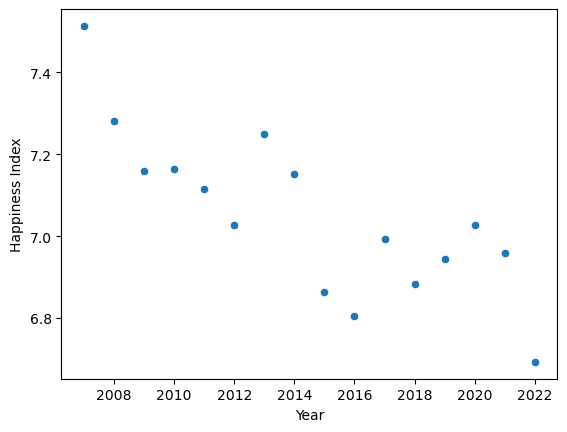

In [74]:
sns.scatterplot(data=HappinessAndGdp[HappinessAndGdp['iso3c'] == 'USA'], x='Year', y='Happiness Index')

In [75]:
HappinessAndGdp[HappinessAndGdp['iso3c'] == 'USA'][['Happiness Index', 'Year']].corr()

Happiness Index      Year
Happiness Index         1.000000 -0.802162
Year                   -0.802162  1.000000

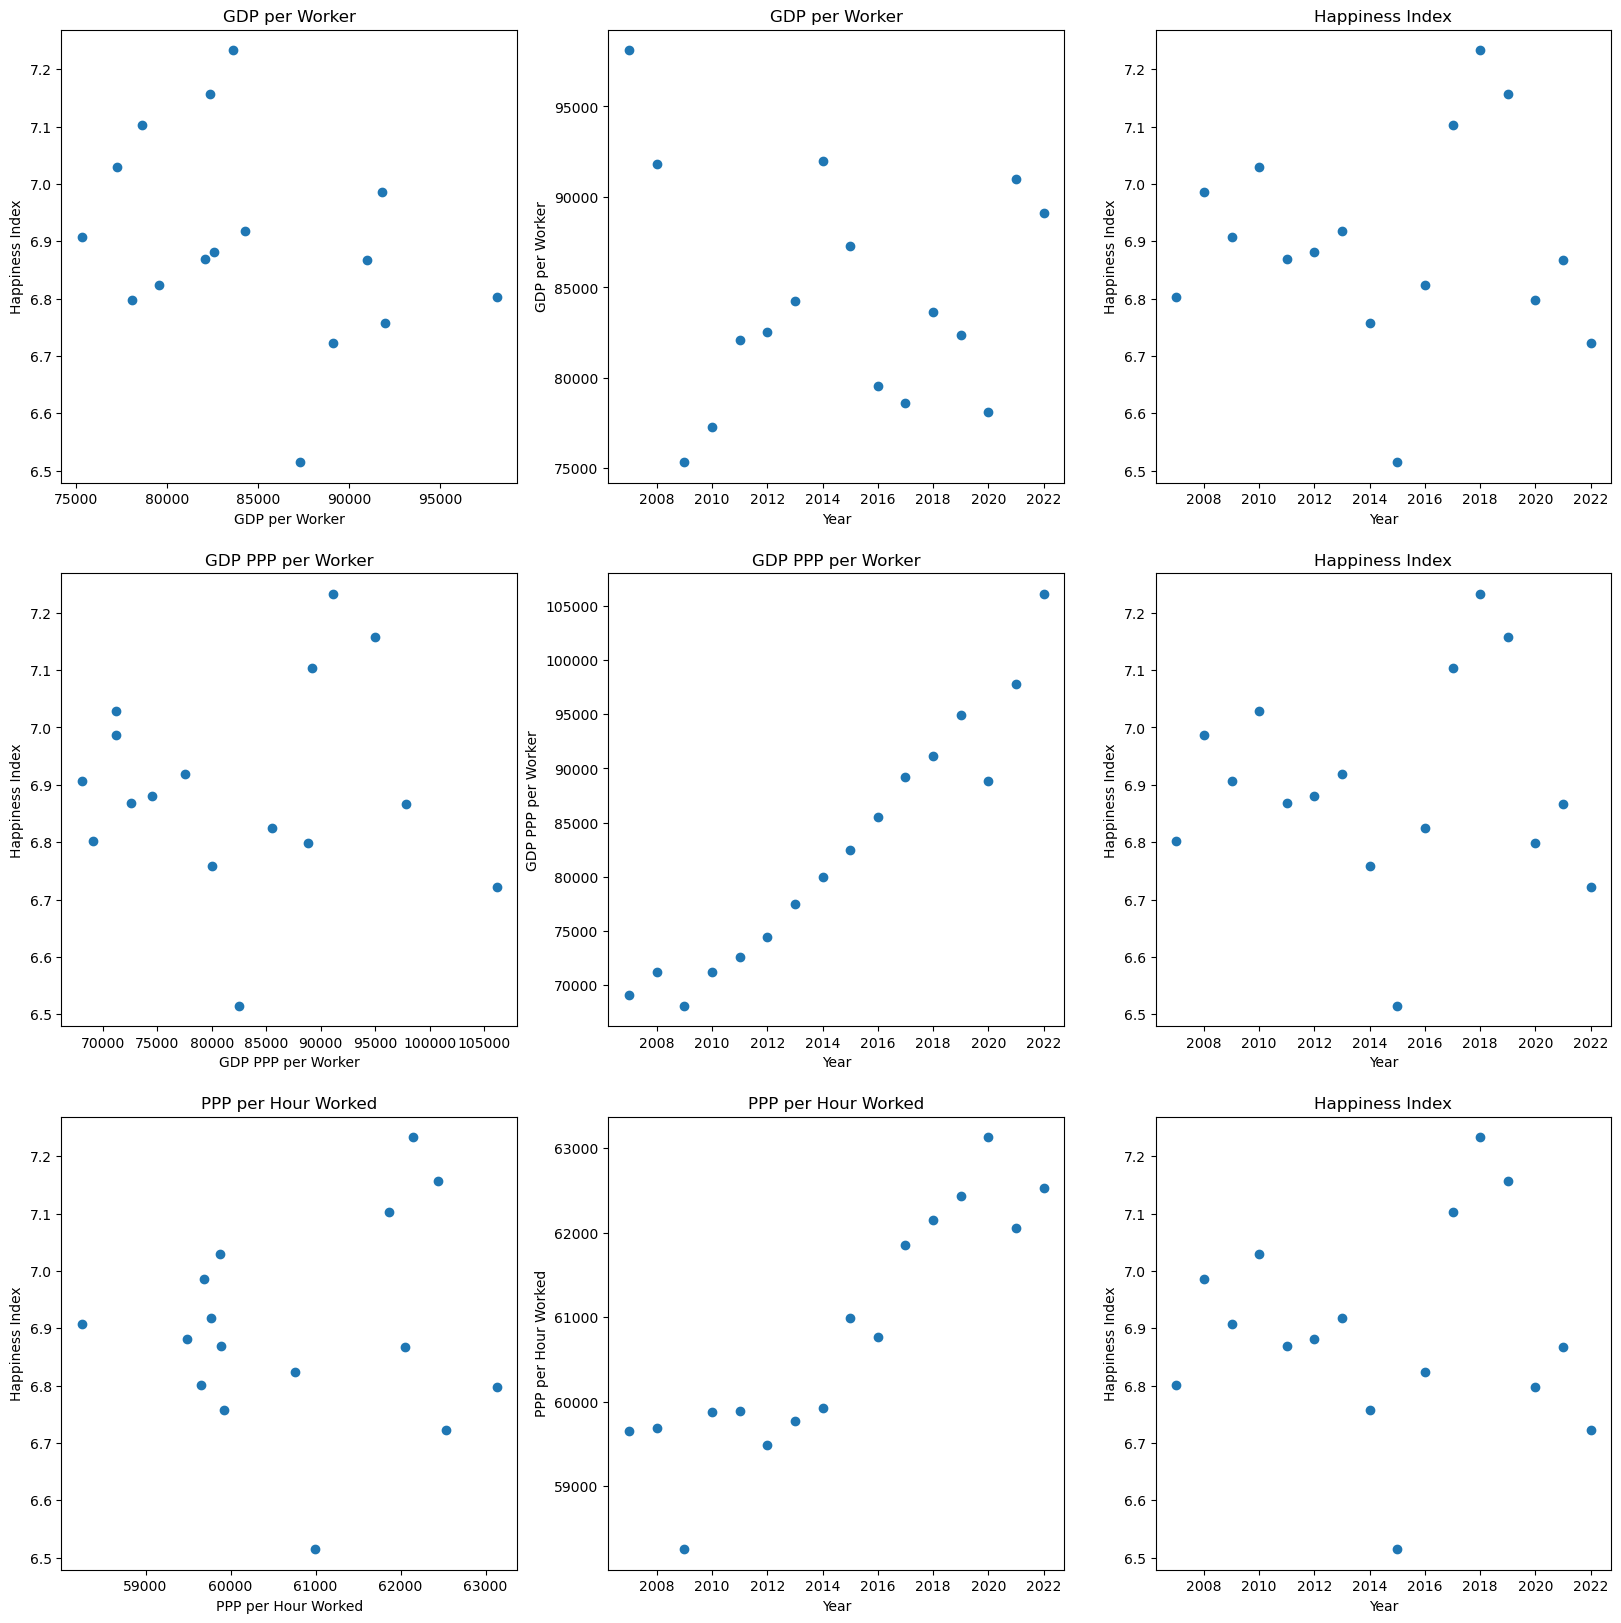

In [33]:
fig, axs = plt.subplots(3, 3)
fig.set_figheight(20)
fig.set_figwidth(20)

laborStats = ['GDP per Worker', 'GDP PPP per Worker', 'PPP per Hour Worked']
CountryCode = 'GBR'

for index, statName in enumerate(laborStats):
    x = 0
    # Add country to plot
    axs[index, x].scatter(HappinessAndGdp[HappinessAndGdp['iso3c'] == CountryCode][statName], HappinessAndGdp[HappinessAndGdp['iso3c'] == CountryCode]['Happiness Index'])
    axs[index, x].set_title(statName)
    axs[index, x].set_xlabel(statName)
    axs[index, x].set_ylabel('Happiness Index')
    x += 1
    axs[index, x].scatter(HappinessAndGdp[HappinessAndGdp['iso3c'] == CountryCode]['Year'], HappinessAndGdp[HappinessAndGdp['iso3c'] == CountryCode][statName])
    axs[index, x].set_title(statName)
    axs[index, x].set_xlabel('Year')
    axs[index, x].set_ylabel(statName)
    x += 1
    axs[index, x].scatter(HappinessAndGdp[HappinessAndGdp['iso3c'] == CountryCode]['Year'], HappinessAndGdp[HappinessAndGdp['iso3c'] == CountryCode]['Happiness Index'])
    axs[index, x].set_title('Happiness Index')
    axs[index, x].set_xlabel('Year')
    axs[index, x].set_ylabel('Happiness Index')

In [76]:

for index, country in enumerate(HappinessAndGdp['country'].unique()):
    x = 0
    # Add country to plot
    HappinessAndGdp[HappinessAndGdp['country'] == country][['GDP per Worker', 'Happiness Index', 'Year']].corr()
    # HappinessAndGdp[HappinessAndGdp['country'] == country][['Year', 'GDP per Worker']].corr()
    # axs[index, x].set_title(country)
    # x += 1
    # axs[index, x].scatter(HappinessAndGdp[HappinessAndGdp['country'] == country]['Year'], HappinessAndGdp[HappinessAndGdp['country'] == country]['Happiness Index'])
    # axs[index, x].set_title(country)

In [77]:
HappinessAndGdp[HappinessAndGdp['Year'] == 2018].sort_values(by='Happiness Index', ascending=False)

Year iso3c         country  GDP per Worker  GDP PPP per Worker  \
332  2018   FIN         Finland   100264.309621        99445.358308   
329  2018   DNK         Denmark   119336.147757       111374.906101   
326  2018   CHE     Switzerland   146391.145696       121434.227003   
345  2018   NLD     Netherlands    98186.845648       107038.633126   
346  2018   NOR          Norway   157285.262649       133464.371031   
323  2018   AUT         Austria    98007.601250       108426.747618   
352  2018   SWE          Sweden   102927.922519       100915.278866   
347  2018   NZL     New Zealand    75812.526607        74533.478803   
343  2018   LUX      Luxembourg   232460.333826       231887.078609   
334  2018   GBR  United Kingdom    83629.692054        91153.126919   
322  2018   AUS       Australia   107320.960400        94162.554659   
325  2018   CAN          Canada    84805.779562        91082.191126   
328  2018   DEU         Germany    90461.816717       104155.010025   
327  2018   CZE         Czechia    45897.685016        80616.789663   
338  2018   ISR          Israel    92478.240992        87735.265206   
324  2018   BEL         Belgium   105616.618404       116691.608580   
353  2018   USA   United States   124211.655102       124211.655102   
333  2018   FRA          France    90936.340735       101832.676663   
339  2018   ITA           Italy    79954.109226        99385.005873   
330  2018   ESP           Spain    62001.419406        83097.932053   
342  2018   LTU       Lithuania    36622.961967        69435.589946   
351  2018   SVN        Slovenia    52341.127577        78083.331920   
350  2018   SVK        Slovakia    38651.632517        62222.592647   
348  2018   POL          Poland    32018.222013        66139.914462   
331  2018   EST         Estonia    43622.969033        68562.891685   
337  2018   HUN         Hungary    34011.097485        66072.567351   
349  2018   PRT        Portugal    46221.614555        68517.769355   
344  2018   LVA          Latvia    34420.659215        59490.976090   
341  2018   KOR     South Korea    60491.406580        77872.289534   
340  2018   JPN           Japan    73711.294267        78144.604988   
336  2018   HRV         Croatia    34180.653674        65862.393509   
335  2018   GRC          Greece    44858.139016        67246.481882   

     PPP per Hour Worked  Happiness Index  Freedom to Make Life Choices  
332         65259.137467            7.858                         0.938  
329         79556.355661            7.649                         0.935  
326         75452.530137            7.509                         0.926  
345         71501.711521            7.463                         0.920  
346         86717.720211            7.444                         0.960  
323         72442.479247            7.396                         0.904  
352         72099.319100            7.375                         0.942  
347         45552.816849            7.370                         0.949  
343        103443.412551            7.243                         0.884  
334         62151.431030            7.233                         0.838  
322         55265.918320            7.177                         0.916  
325         55814.957874            7.175                         0.946  
328         71510.822026            7.118                         0.877  
327         43916.494540            7.034                         0.790  
338         44849.317823            6.927                         0.725  
324         76732.631768            6.892                         0.808  
353         72728.726786            6.883                         0.825  
333         71258.135236            6.666                         0.816  
339         58238.425077            6.517                         0.650  
330         56049.973042            6.513                         0.722  
342         43226.073663            6.309                         0.699  
351         48155.576216         

In [78]:
HappinessAndGdp[HappinessAndGdp['country'] == 'United States'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

GDP per Worker  Happiness Index      Year
GDP per Worker         1.000000        -0.762711  0.971054
Happiness Index       -0.762711         1.000000 -0.802162
Year                   0.971054        -0.802162  1.000000

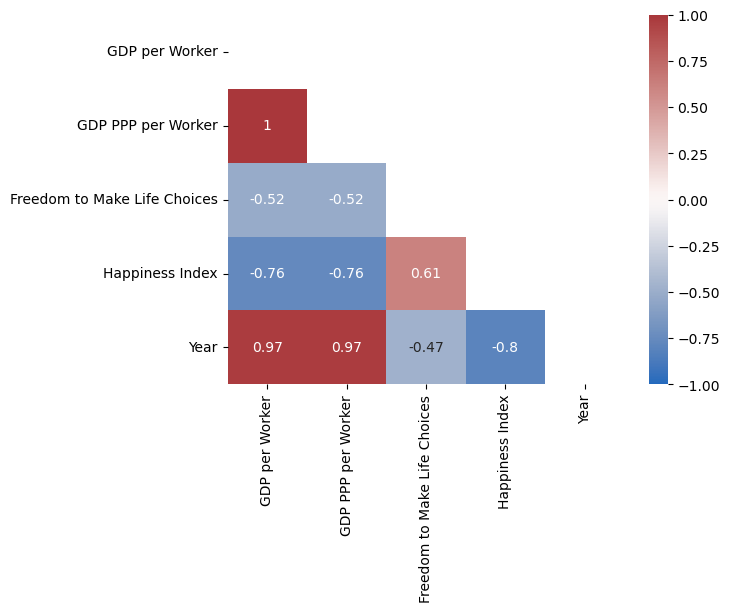

In [79]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'United States'][['GDP per Worker', 'GDP PPP per Worker',
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()


In [80]:
HappinessAndGdp[HappinessAndGdp['country'] == 'United States']['GDP PPP per Worker'].max()

150462.83007555536

In [81]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Australia'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

GDP per Worker  Happiness Index      Year
GDP per Worker         1.000000        -0.062016  0.245061
Happiness Index       -0.062016         1.000000 -0.719058
Year                   0.245061        -0.719058  1.000000

In [82]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Canada']['GDP PPP per Worker'].min()

69568.00578161783

In [83]:
HappinessAndGdp['country'].unique()

array(['Australia', 'Belgium', 'Canada', 'Czechia', 'Germany', 'Denmark',
       'Spain', 'Estonia', 'United Kingdom', 'Greece', 'Croatia',
       'Hungary', 'Israel', 'Italy', 'Japan', 'South Korea', 'Lithuania',
       'Latvia', 'Netherlands', 'New Zealand', 'Poland', 'Sweden',
       'United States', 'Austria', 'Finland', 'France', 'Iceland',
       'Norway', 'Portugal', 'Switzerland', 'Luxembourg', 'Slovenia',
       'Slovakia'], dtype=object)

In [27]:
countryCodes = [
    'AUS', 'AUT', 'BEL', 'CAN', 
    'CHE', 'CZE', 'DEU', 'DNK', 
    'ESP', 'EST', 'FIN', 'FRA', 
    'GBR', 'GRC', 'HRV', 'HUN', 
    'ISL', 'ISR', 'ITA', 'JPN', 
    'KOR', 'LTU', 'LUX', 'LVA',
    'NLD', 'NOR', 'NZL', 'POL', 
    'PRT', 'SVK', 'SVN',  'SWE', 'USA']

In [53]:
df = pd.DataFrame(np.random.random((4,4)))
df2 = pd.DataFrame([1., .5, .9, .6])

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[4,4,4,4,4,0.2]))

for index, code in enumerate(countryCodes):
    HappinessAndGdp[HappinessAndGdp['iso3c'] == code][['Year', 'Happiness Index', 'GDP per Worker', 'GDP PPP per Worker']].corr().round(2)
    vmin = min(HappinessAndGdp[HappinessAndGdp['iso3c'] == code][['Year', 'Happiness Index', 'GDP per Worker', 'GDP PPP per Worker']].values.min(), df2.values.min())
    vmax = max(df.values.max(), df2.values.max())
    sns.heatmap(df, annot=True, cbar=False, ax=axs[0], vmin=vmin)
    sns.heatmap(df2, annot=True, yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()

ValueError: Expected the given number of width ratios to match the number of columns of the grid

<Figure size 640x480 with 0 Axes>

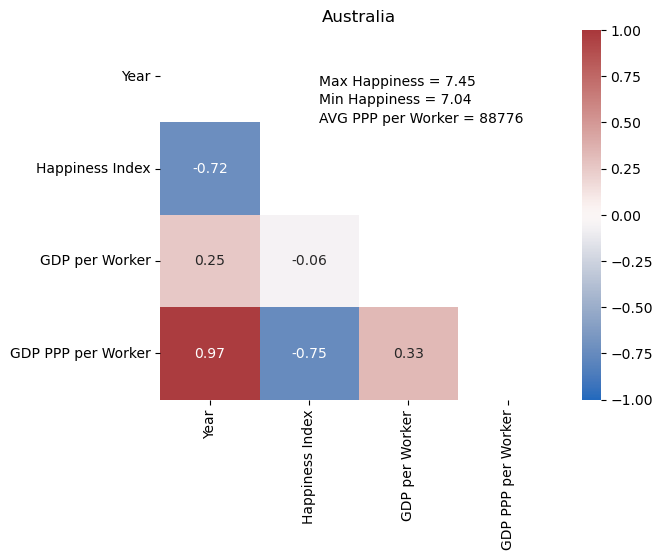

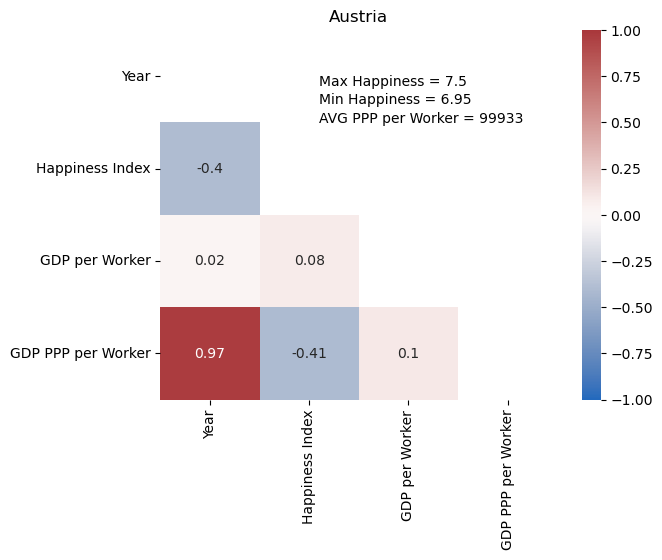

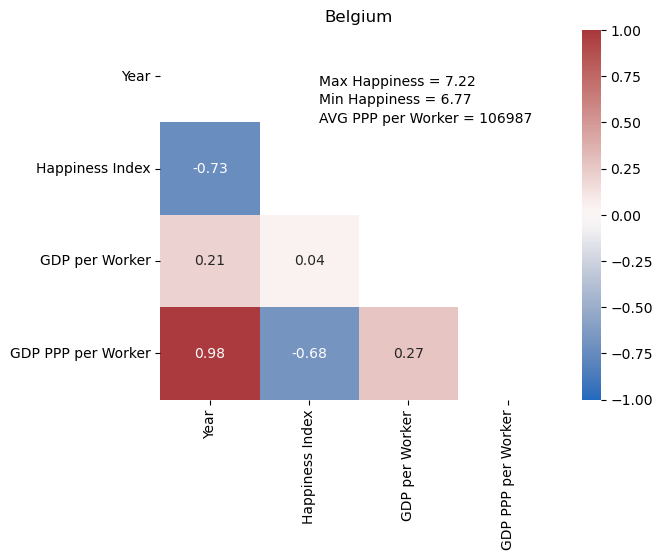

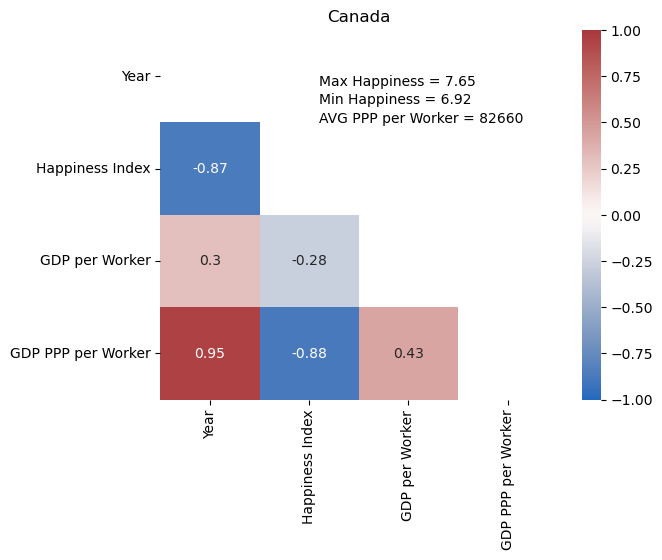

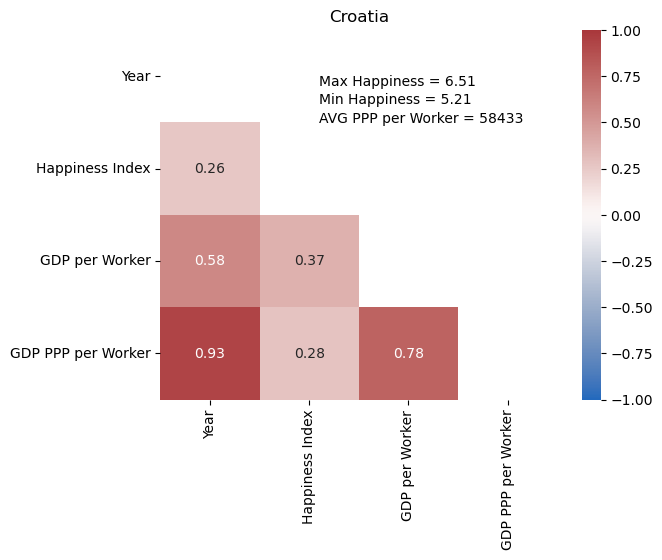

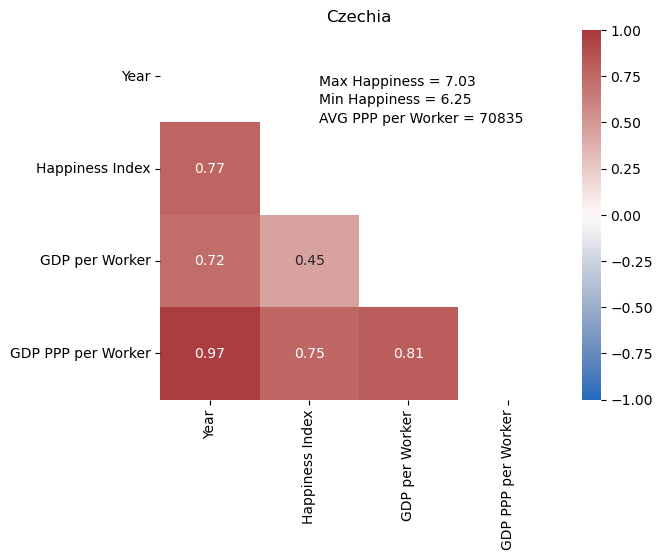

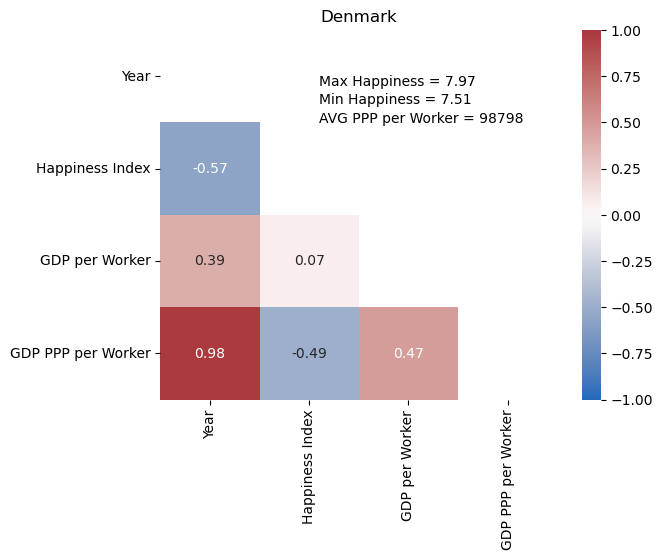

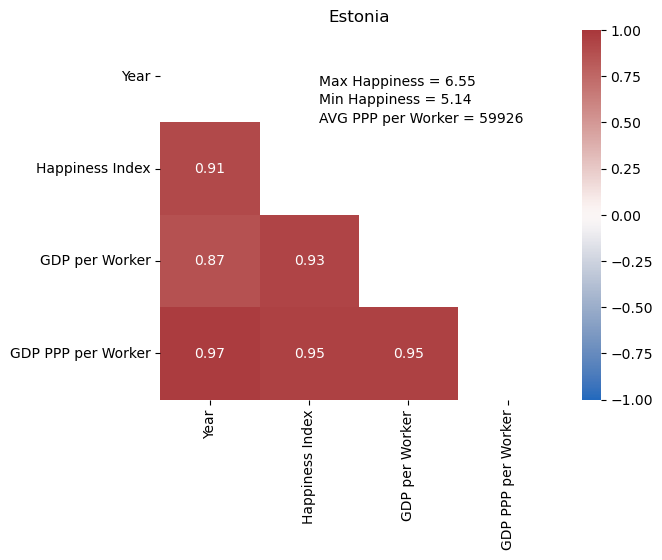

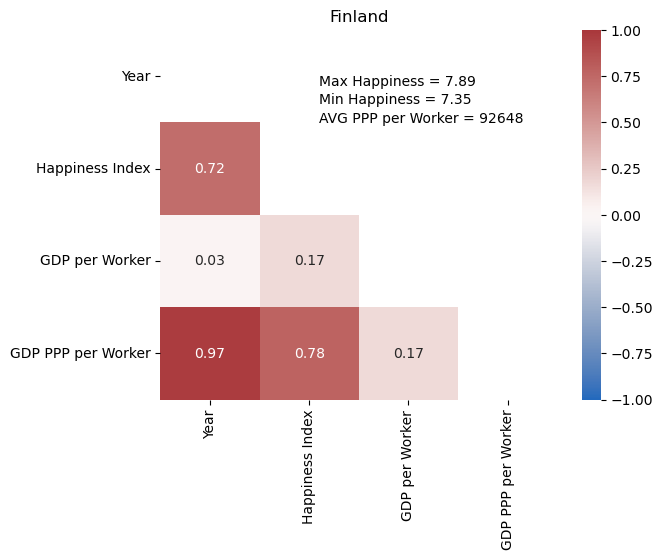

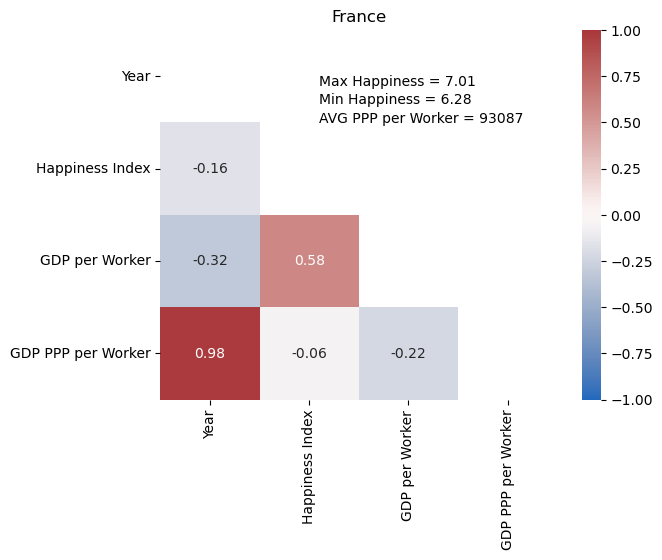

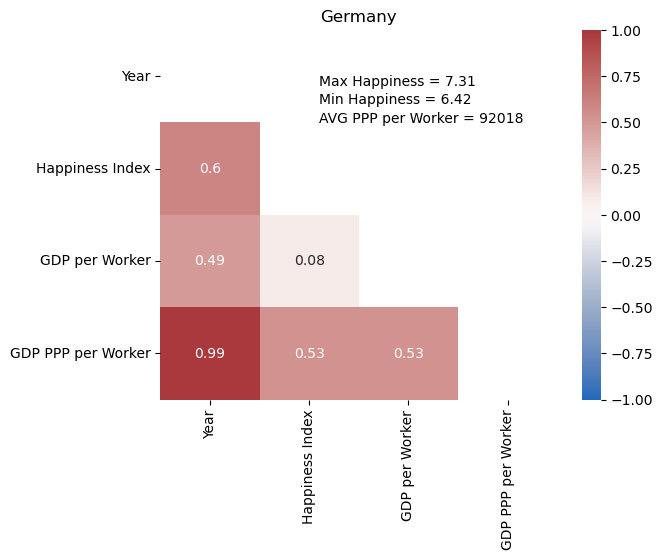

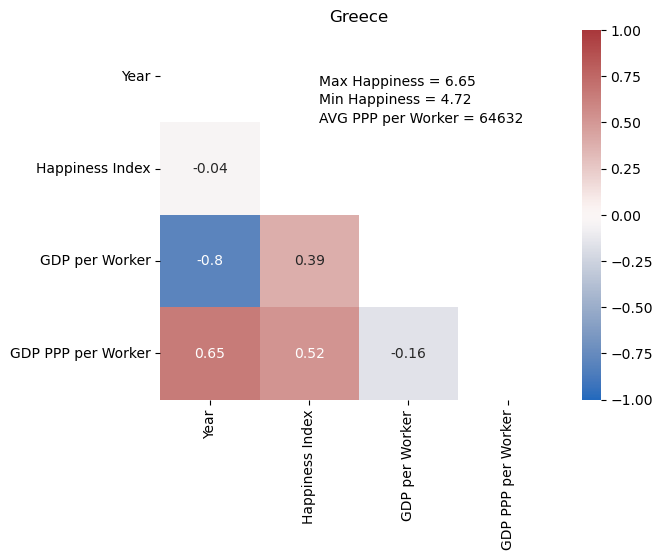

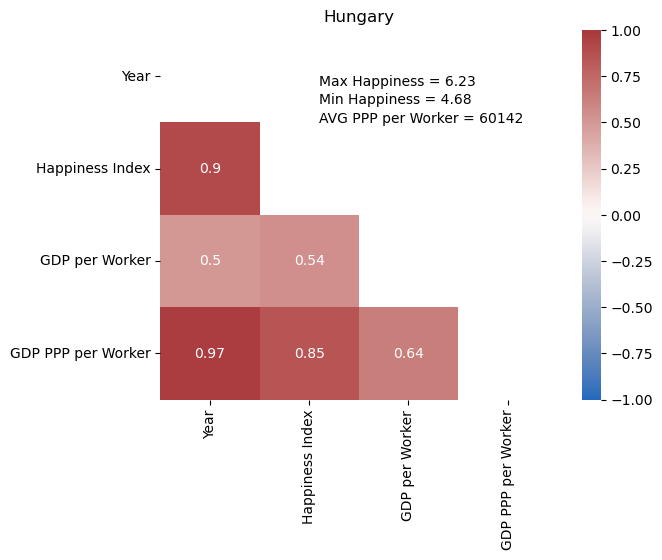

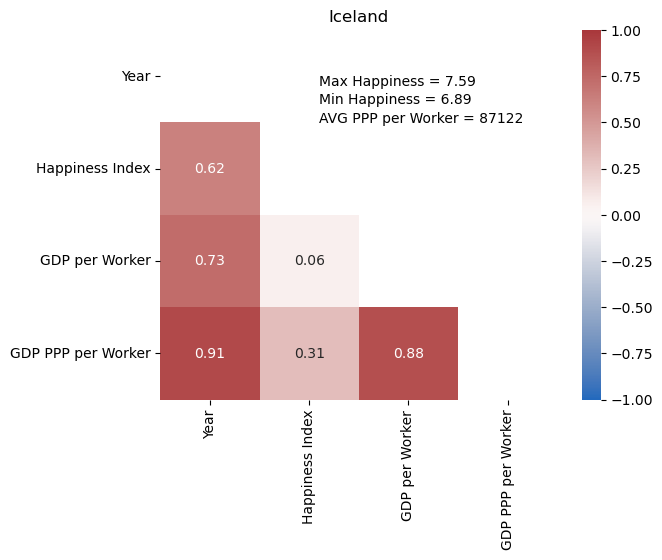

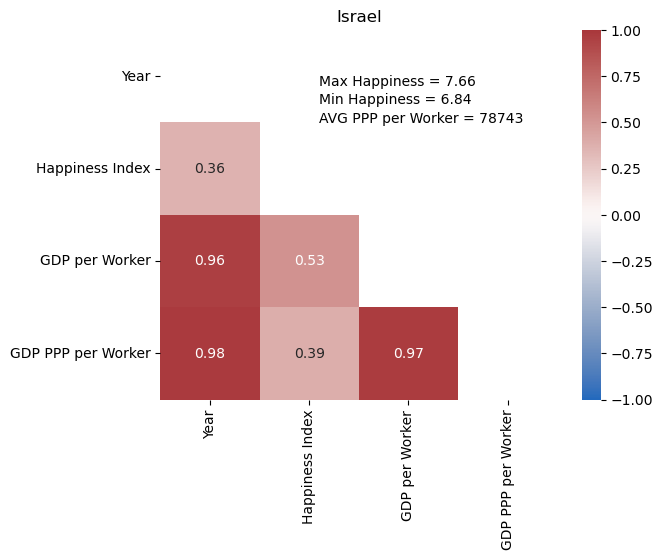

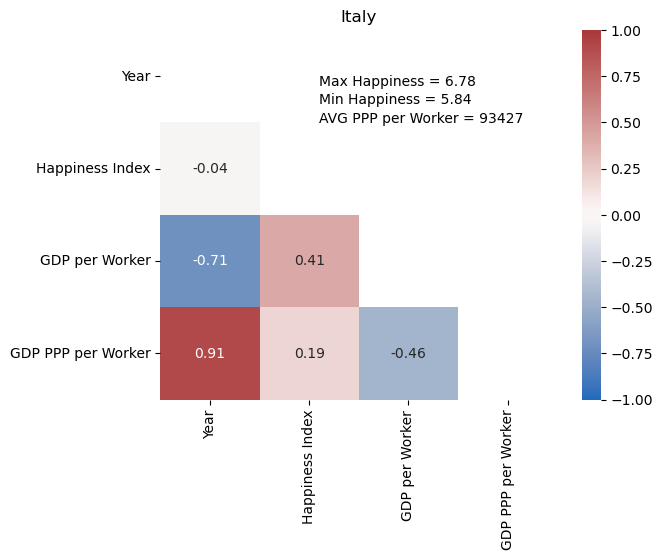

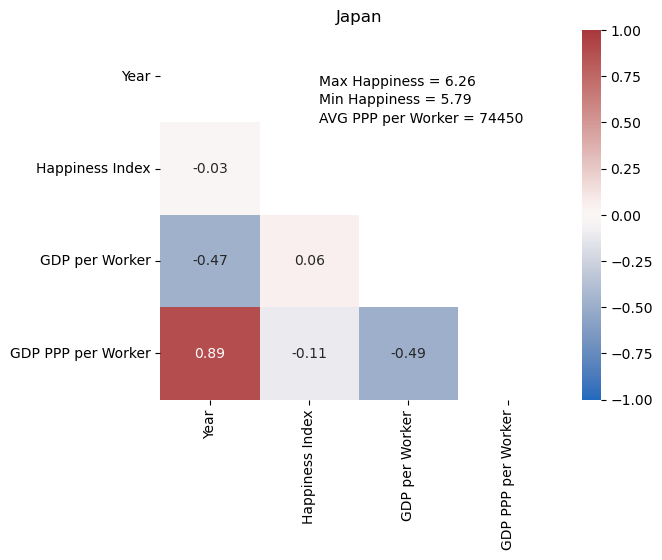

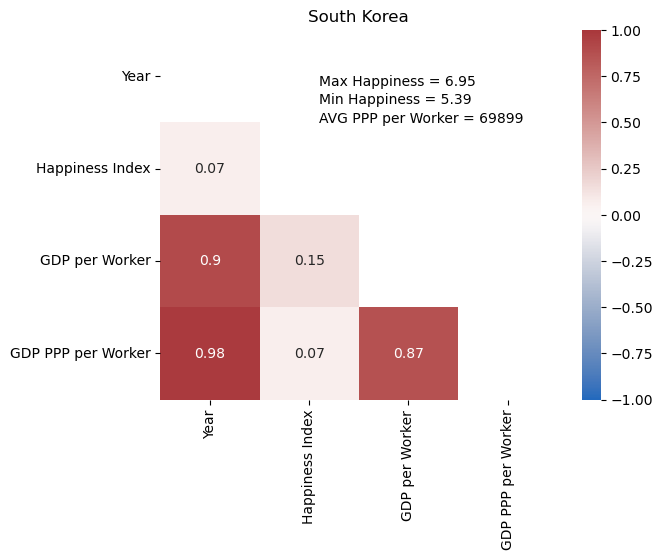

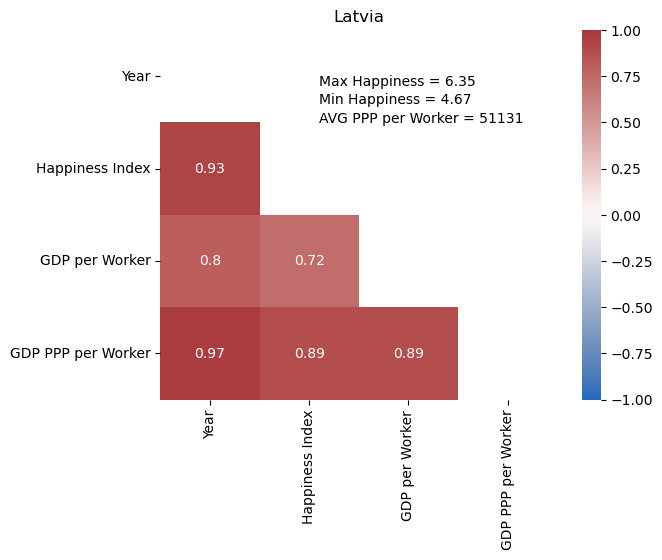

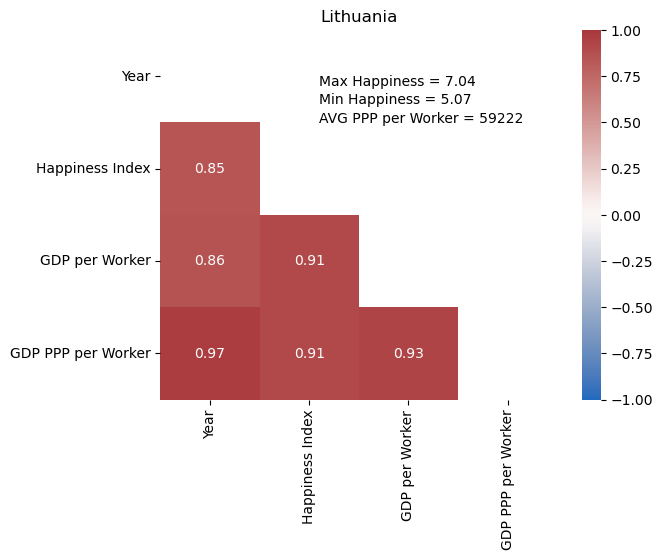

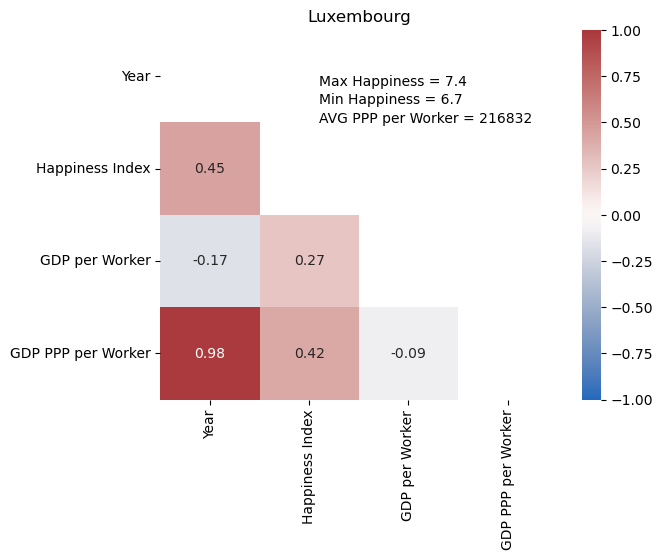

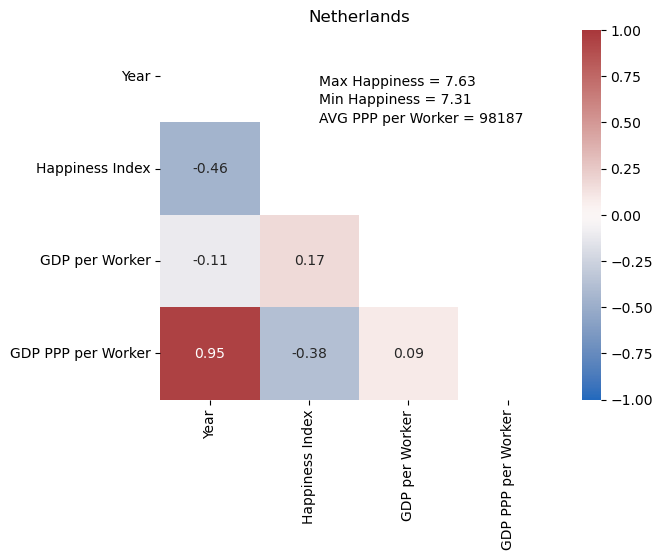

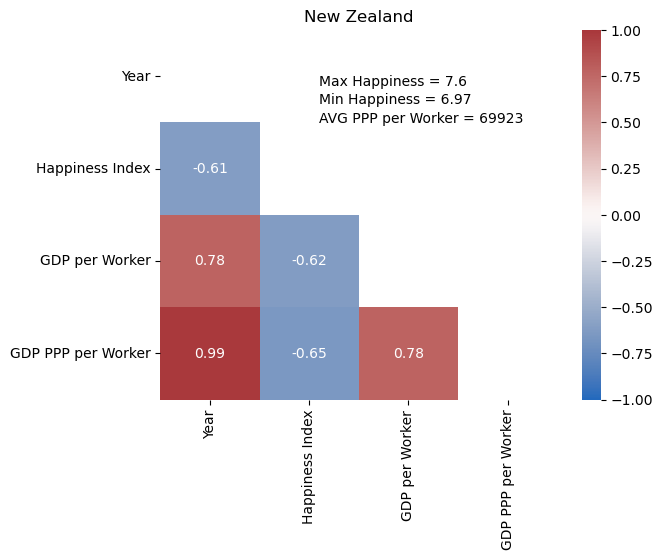

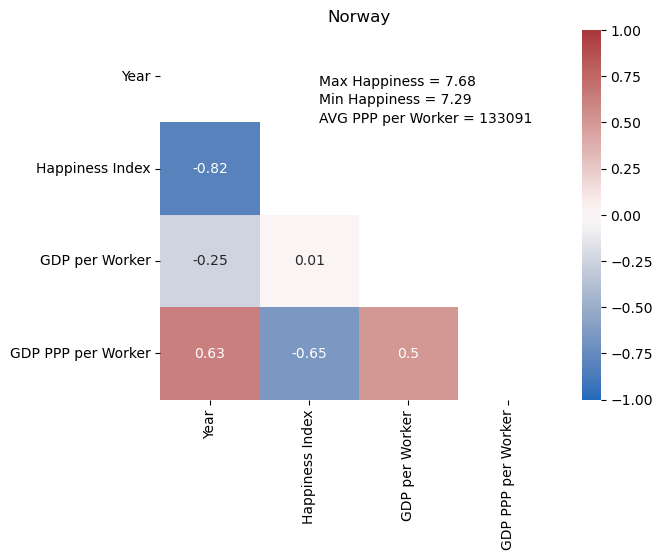

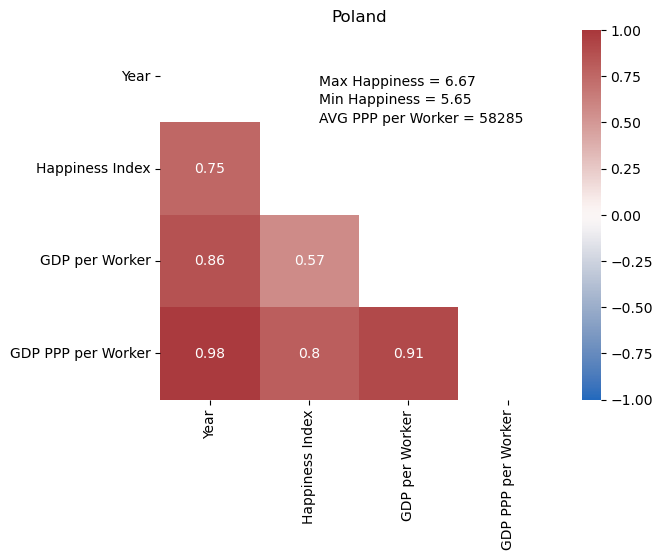

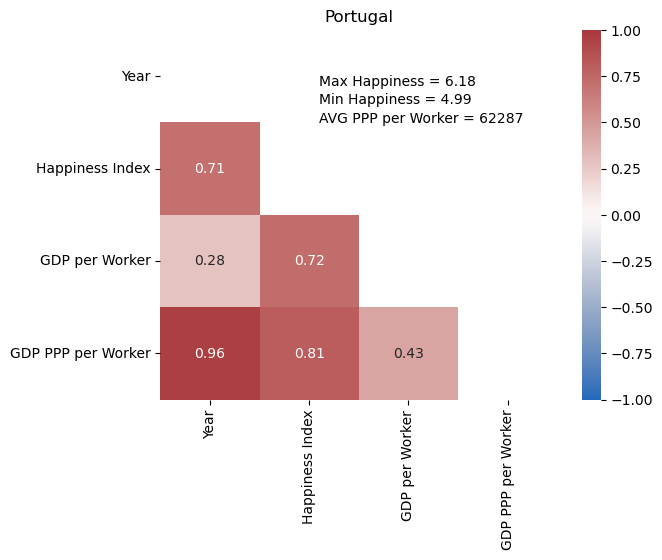

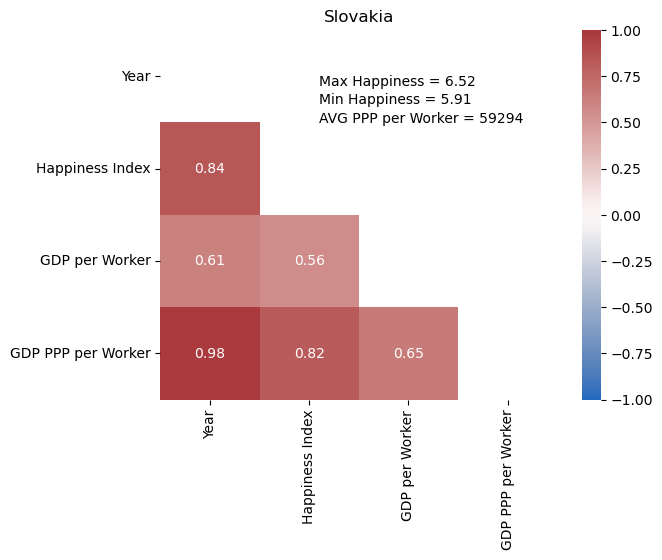

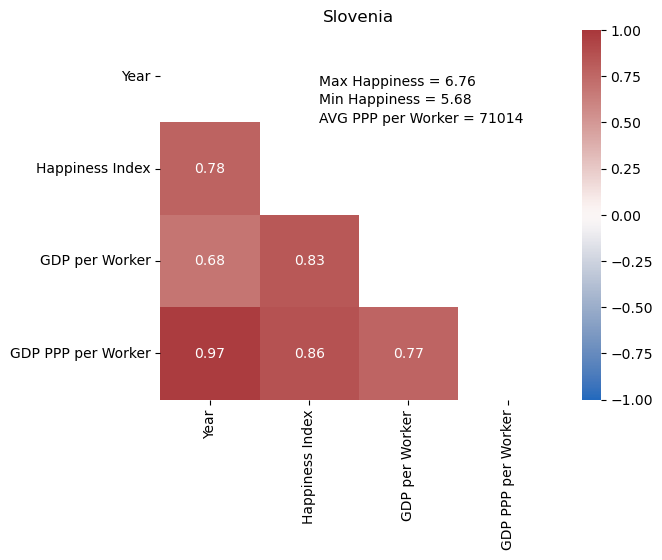

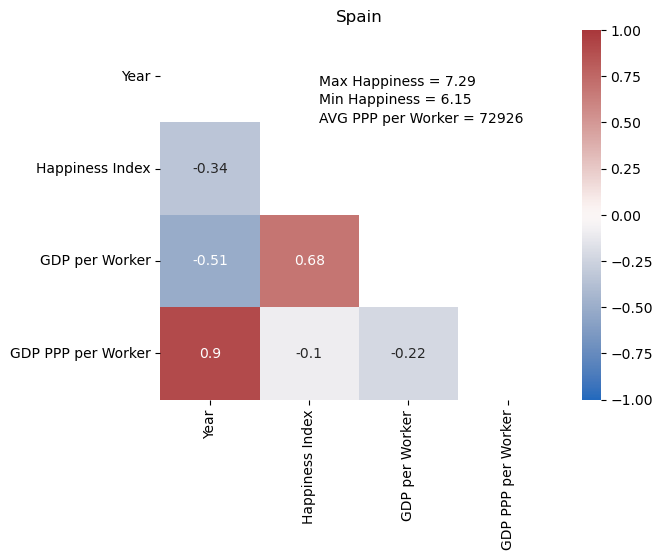

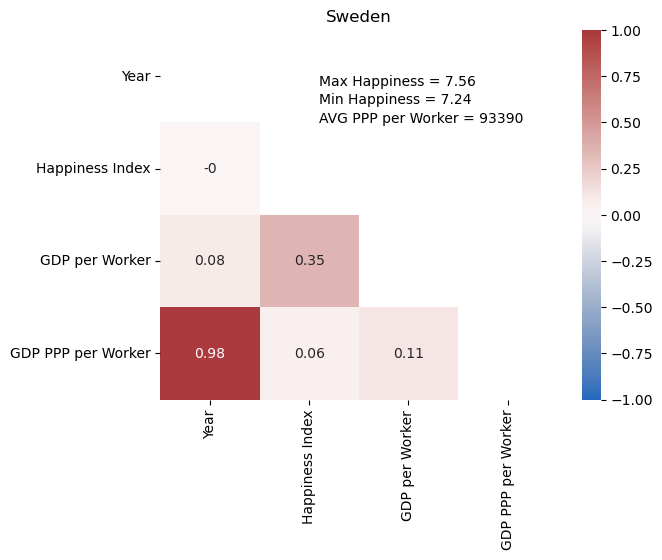

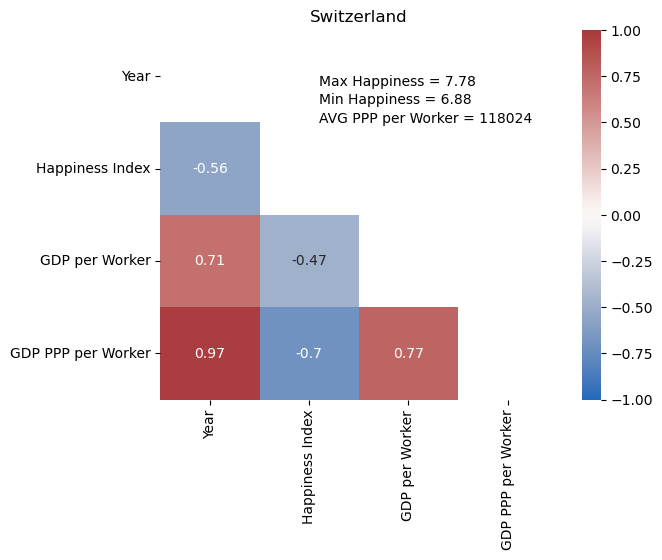

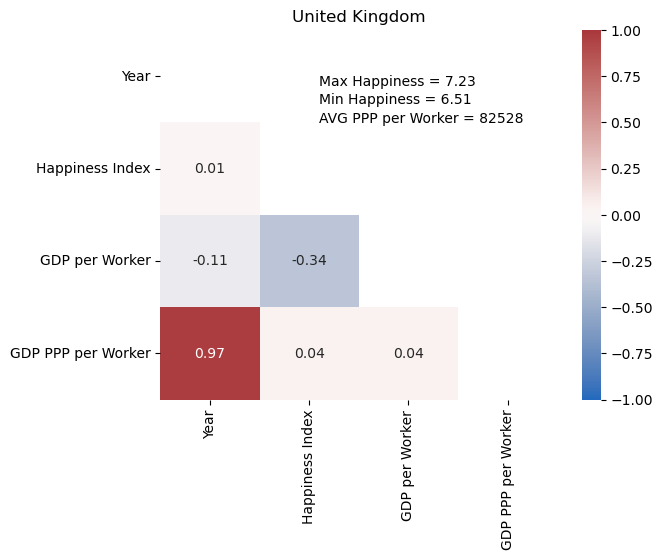

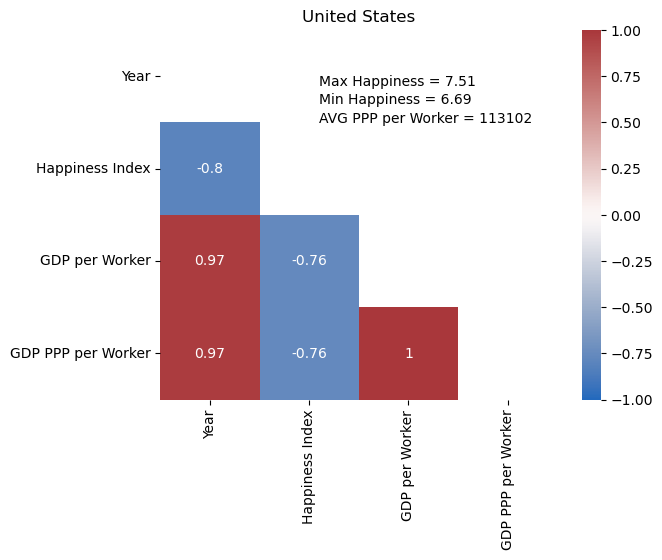

In [54]:
for idex, code in enumerate(countryCodes):
    matrix = HappinessAndGdp[HappinessAndGdp['iso3c'] == code][['Year', 'Happiness Index', 'GDP per Worker', 'GDP PPP per Worker']].corr().round(2)
    HappinessMax = HappinessAndGdp[HappinessAndGdp['iso3c'] == code]['Happiness Index'].max()
    HappinessMin = HappinessAndGdp[HappinessAndGdp['iso3c'] == code]['Happiness Index'].min()
    PPPperWorkerAvg = HappinessAndGdp[HappinessAndGdp['iso3c'] == code]['GDP PPP per Worker'].mean()

    mask = np.triu(np.ones_like(matrix, dtype=bool))
    heatMap = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
    ax = plt.gca()

    plt.text(.4, .85, "Max Happiness = {}".format(round(HappinessMax, 2)), transform=ax.transAxes)
    plt.text(.4, .8, "Min Happiness = {}".format(round(HappinessMin, 2)), transform=ax.transAxes)
    plt.text(.4, .75, "AVG PPP per Worker = {}".format(round(PPPperWorkerAvg)), transform=ax.transAxes)
    plt.title(HappinessAndGdp[(HappinessAndGdp['iso3c'] == code) & (HappinessAndGdp['Year'] == 2015)]['country'].to_string(index=False))
    fig = heatMap.get_figure()
    fig.savefig('GdpAndHappiness_HeatMap_{}'.format(HappinessAndGdp[(HappinessAndGdp['iso3c'] == code) & (HappinessAndGdp['Year'] == 2015)]['country'].to_string(index=False)), dpi=300, bbox_inches='tight')
    plt.show()

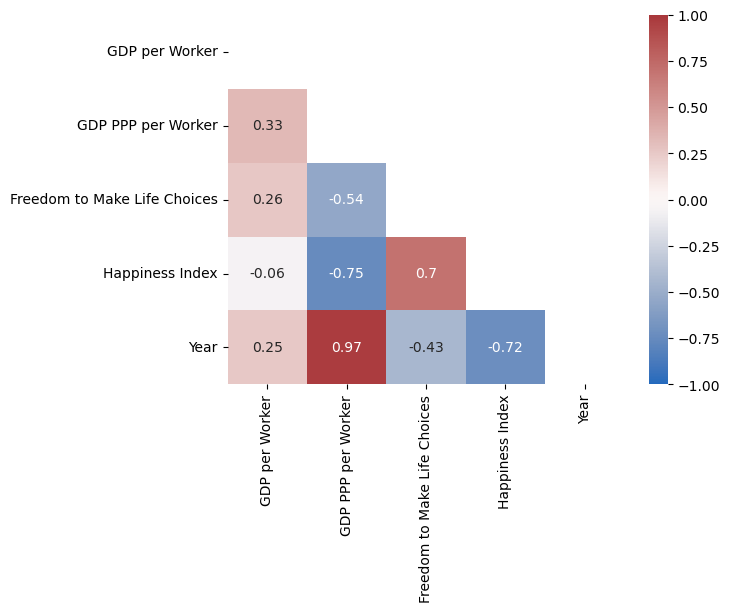

In [86]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Australia'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [87]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Austria'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

GDP per Worker  Happiness Index      Year
GDP per Worker         1.000000         0.075341  0.016005
Happiness Index        0.075341         1.000000 -0.402293
Year                   0.016005        -0.402293  1.000000

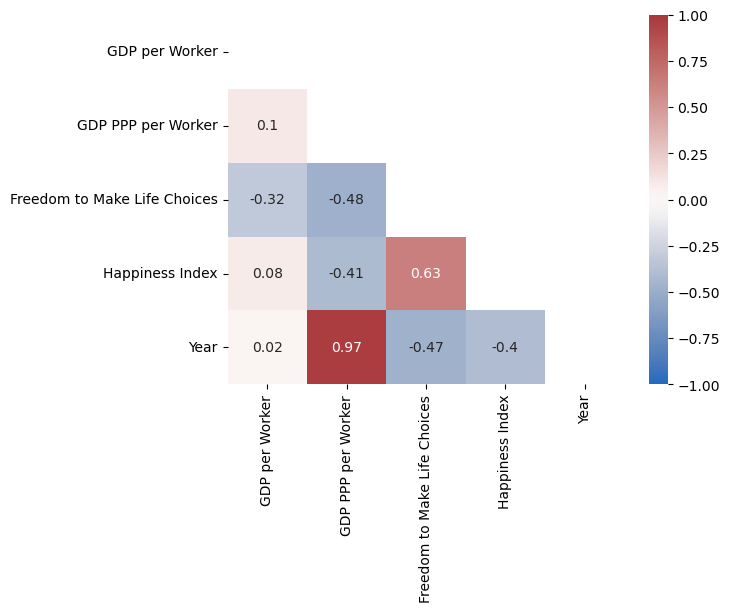

In [88]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Austria'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [89]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Belgium'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

GDP per Worker  Happiness Index      Year
GDP per Worker         1.000000         0.042918  0.205922
Happiness Index        0.042918         1.000000 -0.734787
Year                   0.205922        -0.734787  1.000000

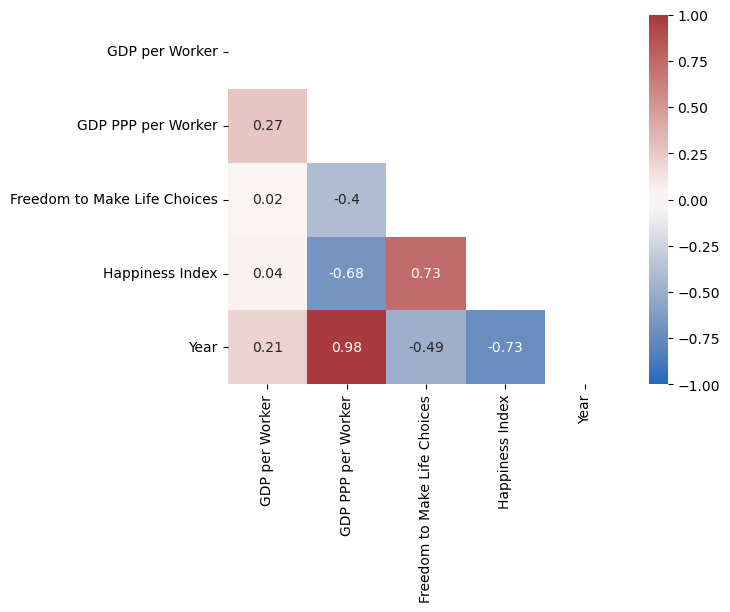

In [90]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Belgium'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [91]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Canada'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

GDP per Worker  Happiness Index      Year
GDP per Worker         1.000000        -0.278246  0.303940
Happiness Index       -0.278246         1.000000 -0.872826
Year                   0.303940        -0.872826  1.000000

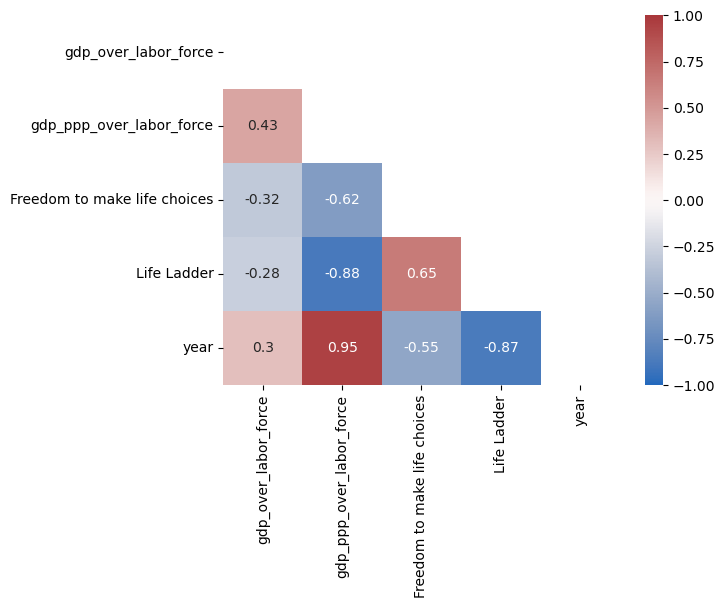

In [402]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Canada'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [242]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Croatia'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.367385  0.578344
Life Ladder                       0.367385     1.000000  0.263681
year                              0.578344     0.263681  1.000000

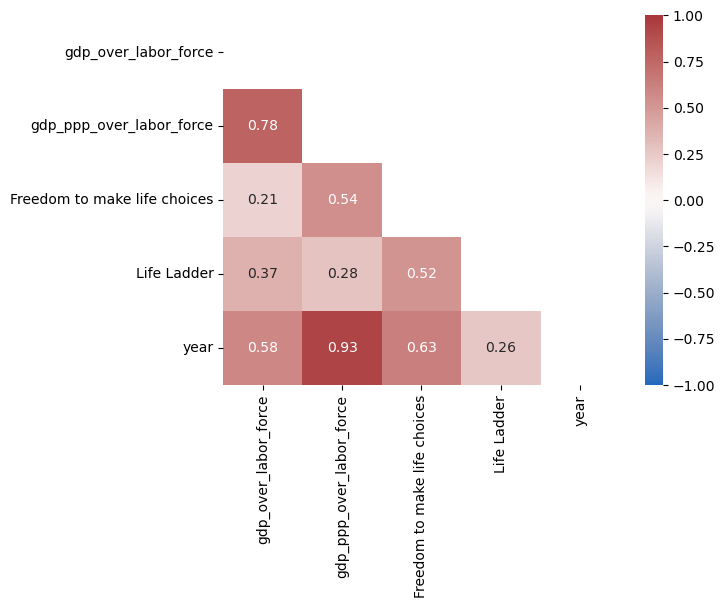

In [403]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Croatia'][['GDP per Worker', 'GDP PPP per Worker',
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [245]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Czechia'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.445958  0.724649
Life Ladder                       0.445958     1.000000  0.771836
year                              0.724649     0.771836  1.000000

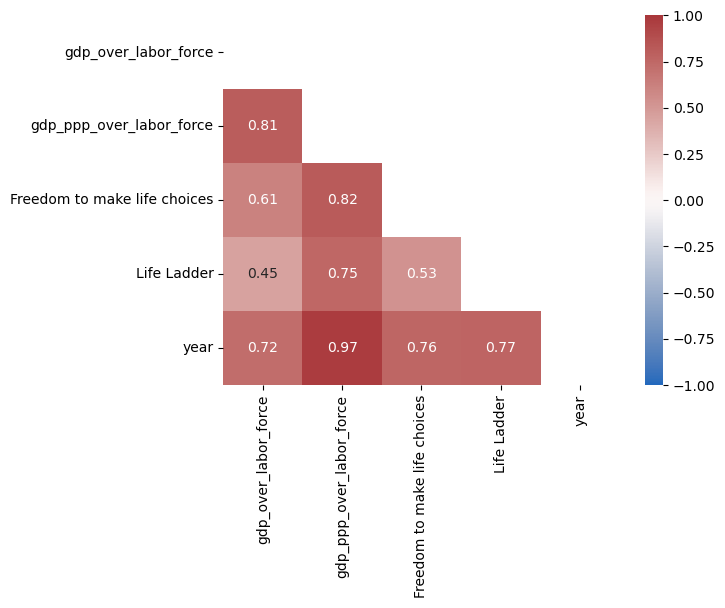

In [404]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Czechia'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [246]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Denmark'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.072451  0.393905
Life Ladder                       0.072451     1.000000 -0.573502
year                              0.393905    -0.573502  1.000000

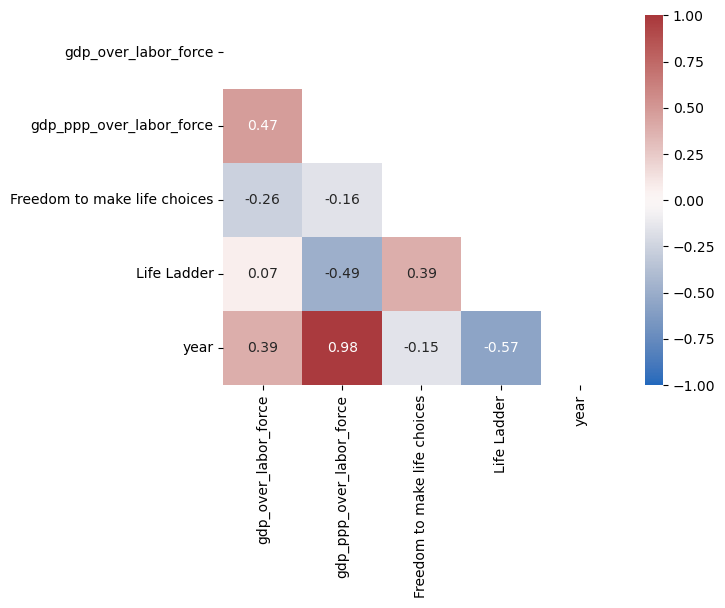

In [405]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Denmark'][['GDP per Worker', 'GDP PPP per Worker',
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [247]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Estonia'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.927203  0.870447
Life Ladder                       0.927203     1.000000  0.914401
year                              0.870447     0.914401  1.000000

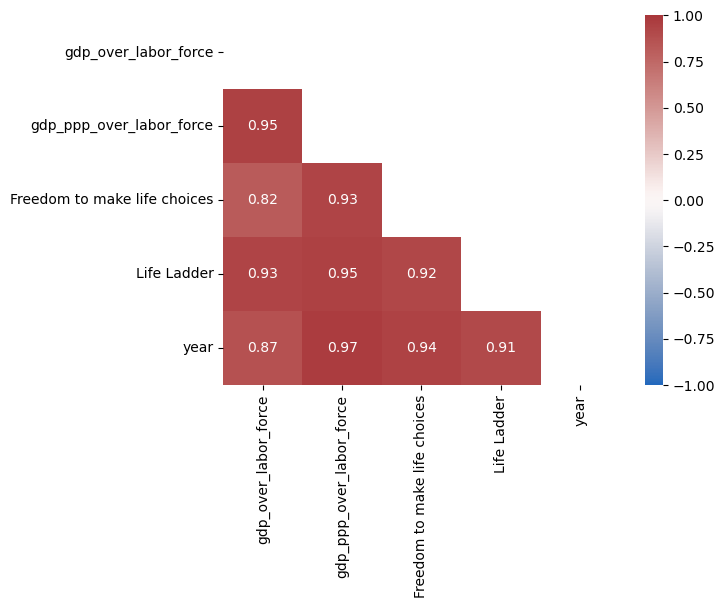

In [406]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Estonia'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

<Axes: xlabel='year', ylabel='Life Ladder'>

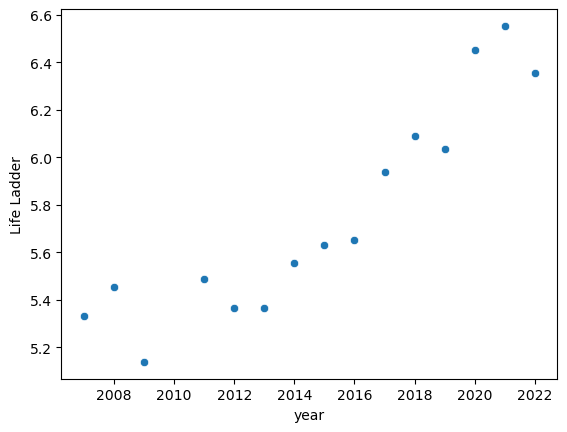

In [369]:
sns.scatterplot(data = HappinessAndGdp[HappinessAndGdp['country'] == 'Estonia'], y='Happiness Index', x='Year')

In [248]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Finland'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.173991  0.026358
Life Ladder                       0.173991     1.000000  0.717707
year                              0.026358     0.717707  1.000000

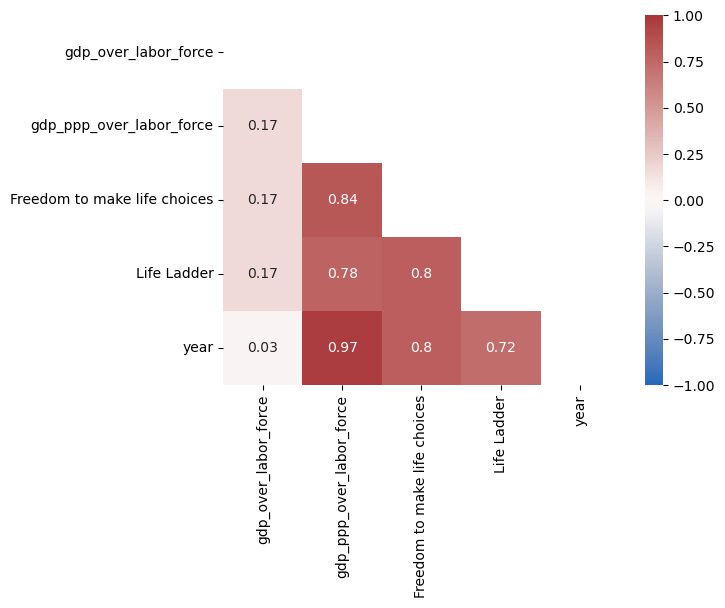

In [371]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Finland'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [249]:
HappinessAndGdp[HappinessAndGdp['country'] == 'France'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.576553 -0.316679
Life Ladder                       0.576553     1.000000 -0.164879
year                             -0.316679    -0.164879  1.000000

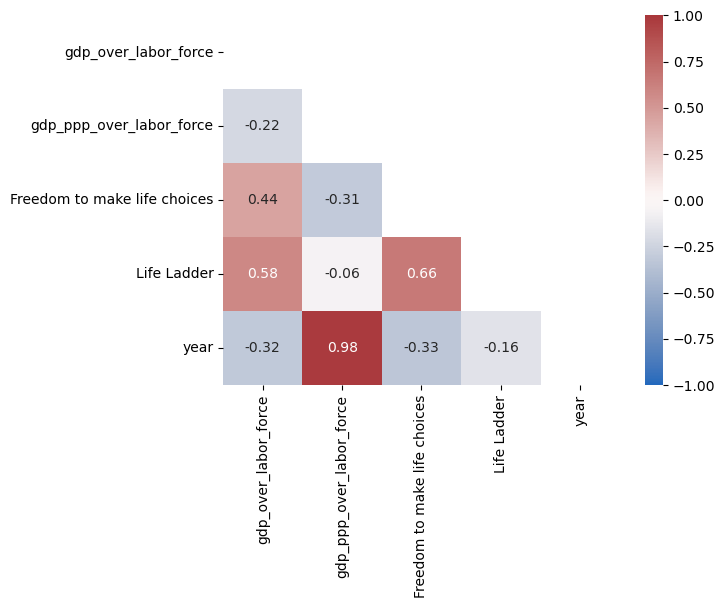

In [372]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'France'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [250]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Germany'][['GDP per Worker', 'Happiness Index', 'Year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.076155  0.485640
Life Ladder                       0.076155     1.000000  0.595674
year                              0.485640     0.595674  1.000000

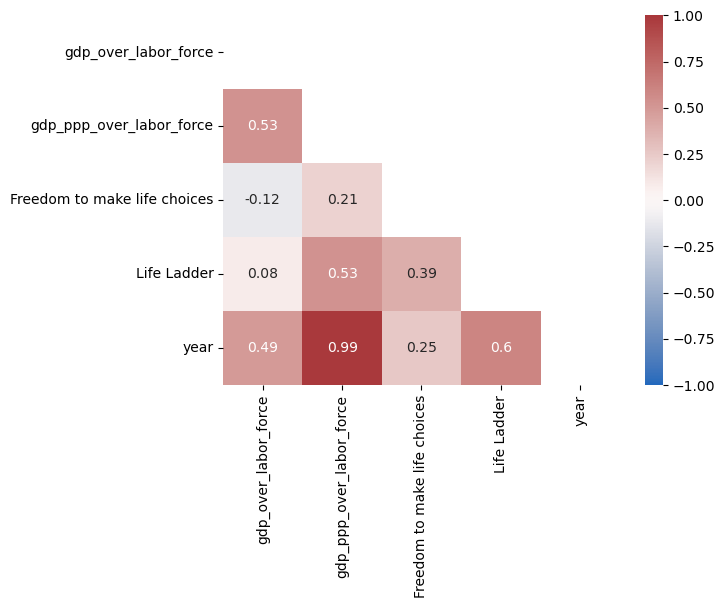

In [380]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Germany'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

<Axes: xlabel='year', ylabel='gdp_ppp_over_labor_force'>

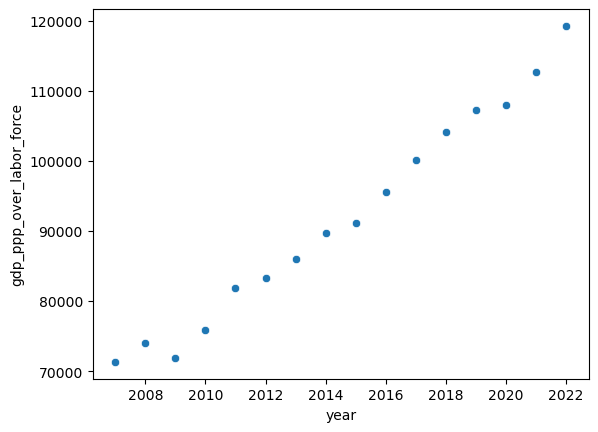

In [382]:
sns.scatterplot(data=HappinessAndGdp[HappinessAndGdp['country'] == 'Germany'], x='Year', y='GDP PPP per Worker')

In [453]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Greece'][['GDP per Worker', 'Happiness Index', 'Year', 'GDP PPP per Worker']].corr()

gdp_over_labor_force  Life Ladder      year  \
gdp_over_labor_force                  1.000000     0.385046 -0.800885   
Life Ladder                           0.385046     1.000000 -0.043982   
year                                 -0.800885    -0.043982  1.000000   
gdp_ppp_over_labor_force             -0.156737     0.519558  0.651799   

                          gdp_ppp_over_labor_force  
gdp_over_labor_force                     -0.156737  
Life Ladder                               0.519558  
year                                      0.651799  
gdp_ppp_over_labor_force                  1.000000

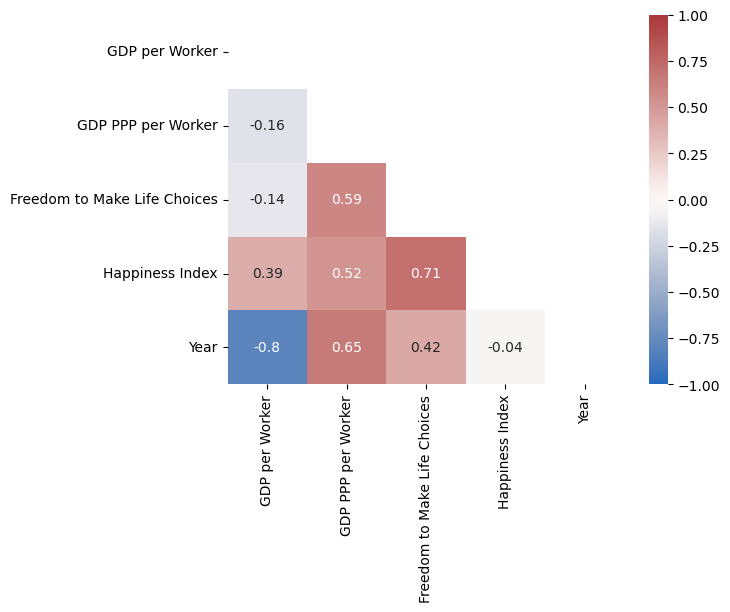

In [55]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Greece'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'Year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

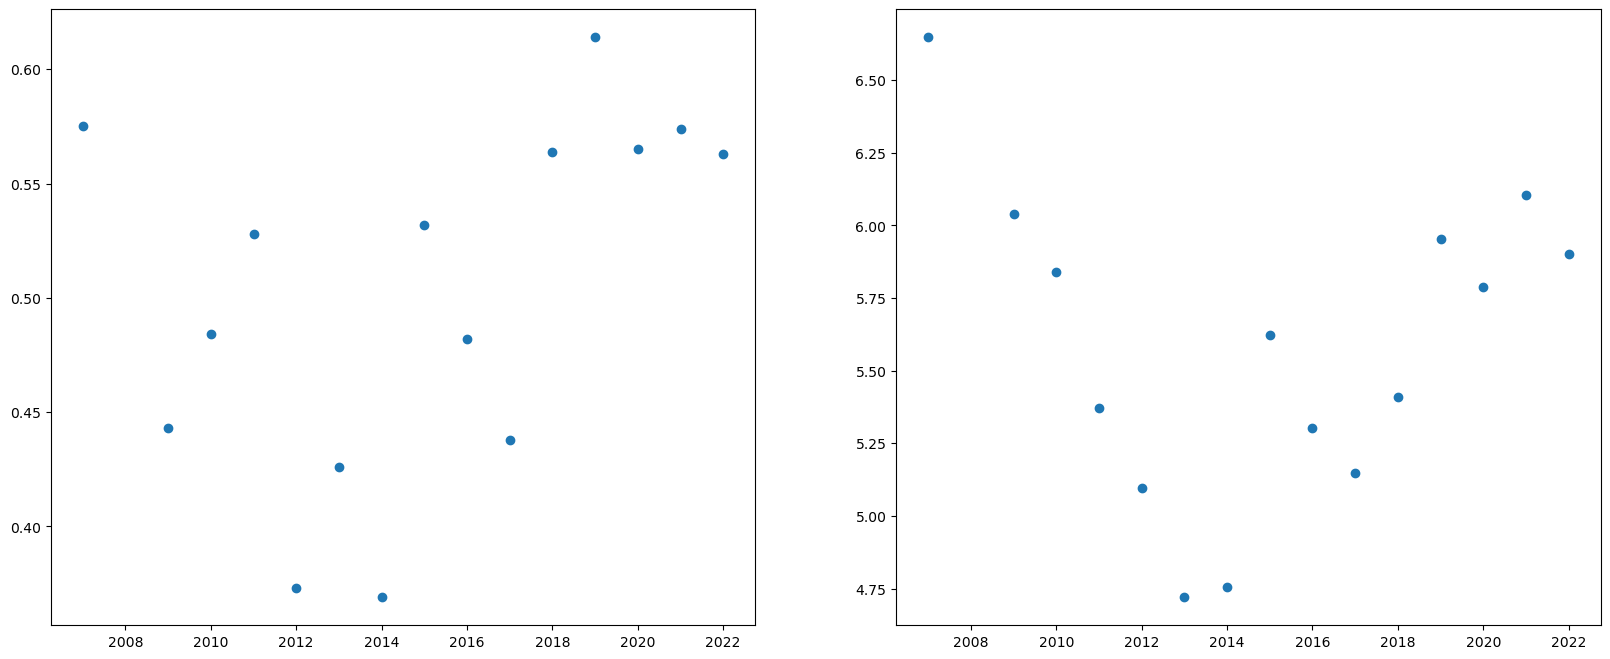

In [30]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(20)

axs[0].scatter(HappinessAndGdp[HappinessAndGdp['country'] == 'Greece']['year'], HappinessAndGdp[HappinessAndGdp['country'] == 'Greece']['Freedom to Make Life Choices'])
axs[1].scatter(HappinessAndGdp[HappinessAndGdp['country'] == 'Greece']['year'], HappinessAndGdp[HappinessAndGdp['country'] == 'Greece']['Happiness Index'])

plt.show()

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.08, 0.9, "Pearson's r = 0.65")

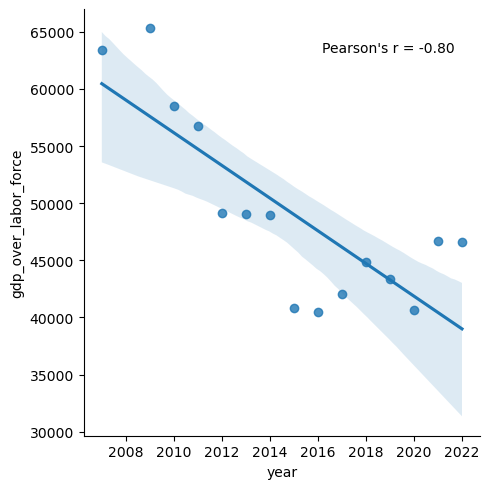

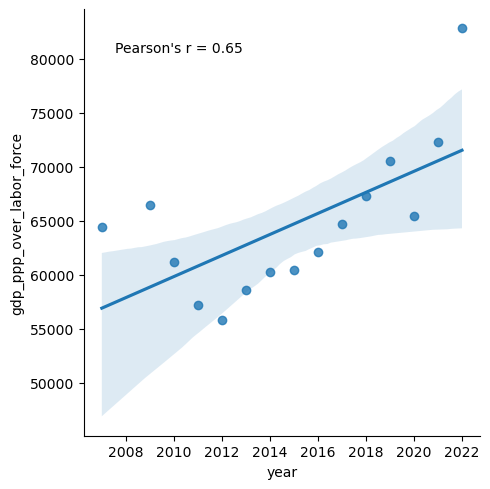

In [465]:
sns.lmplot(data=HappinessAndGdp[HappinessAndGdp['country'] == 'Greece'], x='year', y='GDP per Worker')
ax = plt.gca()
r = HappinessAndGdp[HappinessAndGdp['country'] == 'Greece'][['GDP per Worker', 'Happiness Index', 'year', 'GDP PPP per Worker']].corr().iloc[0,2]
plt.text(.6, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)
sns.lmplot(data=HappinessAndGdp[HappinessAndGdp['country'] == 'Greece'], x='year', y='GDP PPP per Worker')
ax = plt.gca()
r = HappinessAndGdp[HappinessAndGdp['country'] == 'Greece'][['GDP per Worker', 'Happiness Index', 'year', 'GDP PPP per Worker']].corr().iloc[3,2]
plt.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

In [252]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Hungary'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.541156  0.502461
Life Ladder                       0.541156     1.000000  0.895413
year                              0.502461     0.895413  1.000000

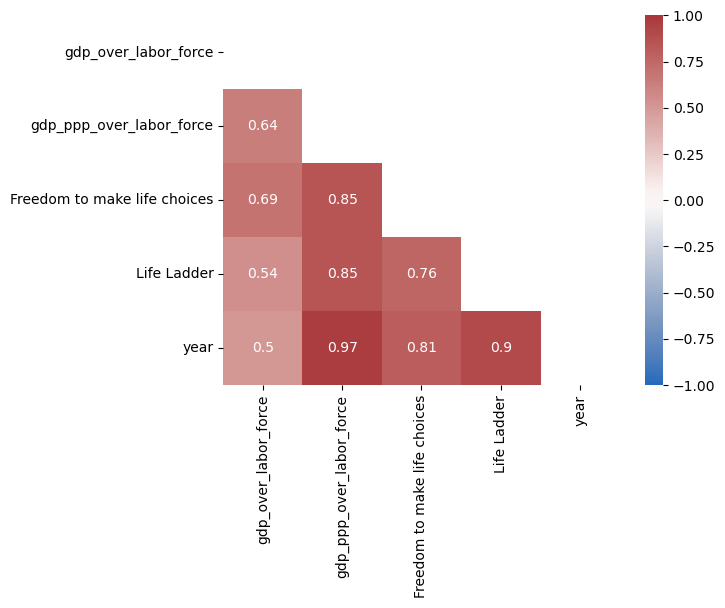

In [384]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Hungary'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [307]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Iceland'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.056749  0.733782
Life Ladder                       0.056749     1.000000  0.617312
year                              0.733782     0.617312  1.000000

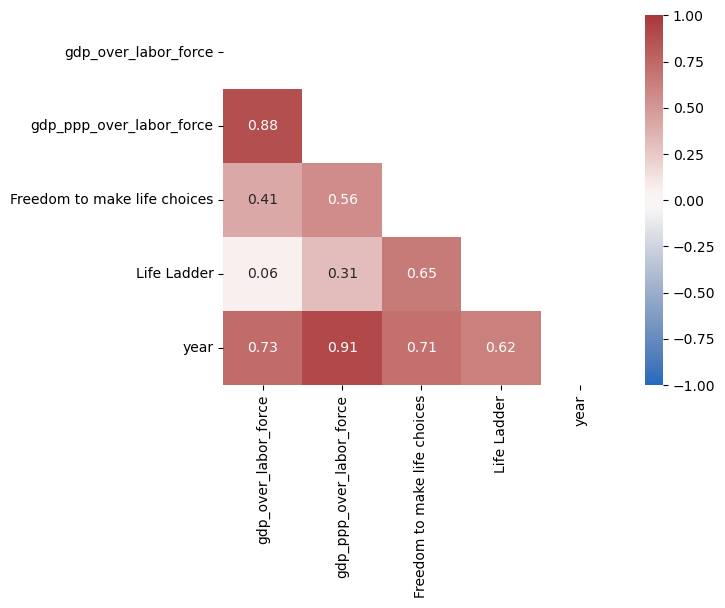

In [407]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Iceland'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [31]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Israel'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.528297  0.963228
Life Ladder                       0.528297     1.000000  0.363499
year                              0.963228     0.363499  1.000000

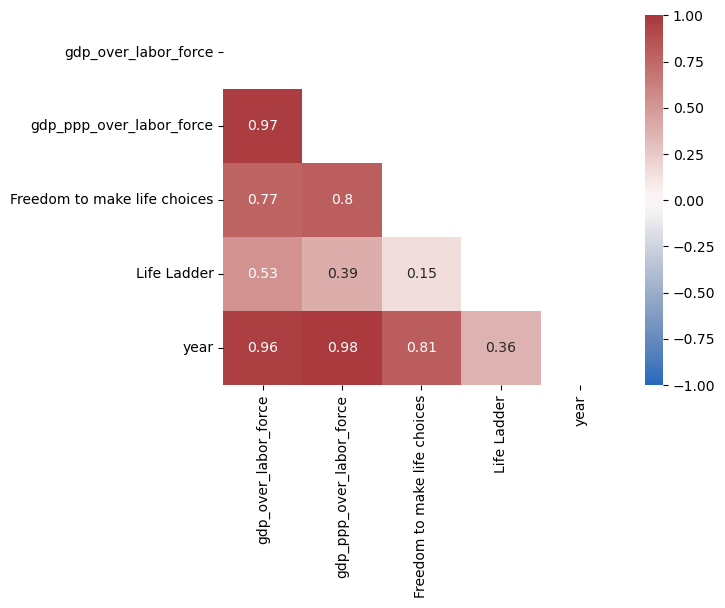

In [34]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Israel'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [301]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Italy'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.408890 -0.710595
Life Ladder                       0.408890     1.000000 -0.040353
year                             -0.710595    -0.040353  1.000000

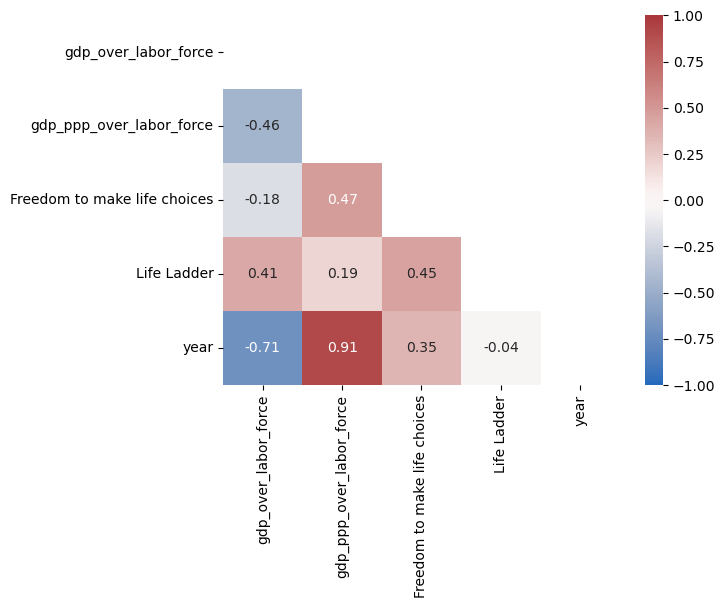

In [33]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Italy'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [299]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Japan'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.064752 -0.473467
Life Ladder                       0.064752     1.000000 -0.025846
year                             -0.473467    -0.025846  1.000000

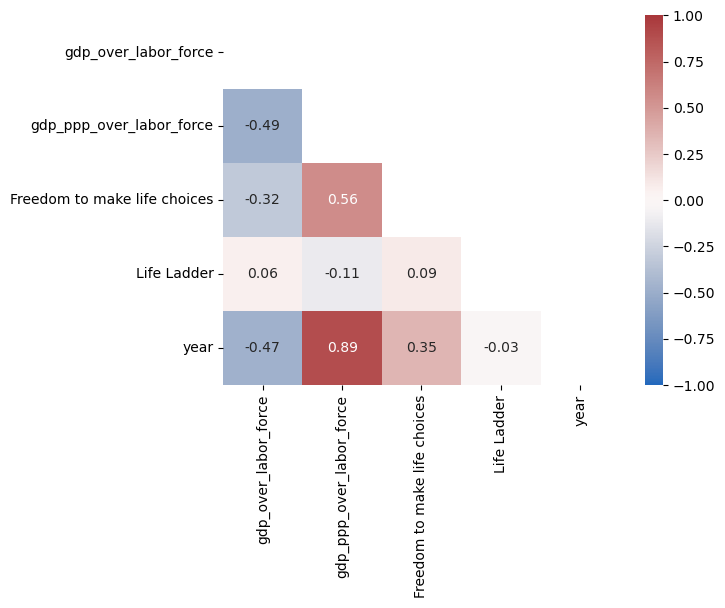

In [36]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Japan'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [297]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Latvia'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.722531  0.801193
Life Ladder                       0.722531     1.000000  0.925035
year                              0.801193     0.925035  1.000000

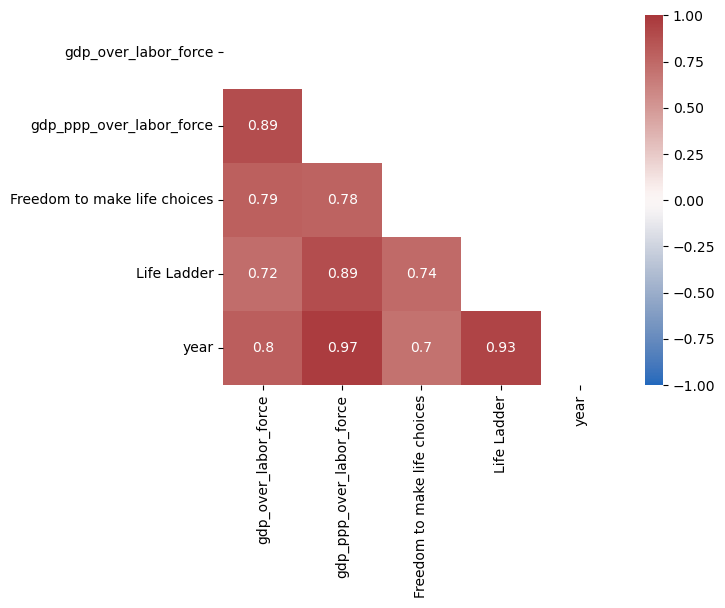

In [37]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Latvia'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [327]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Lithuania'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_ppp_over_labor_force  Life Ladder      year
gdp_ppp_over_labor_force                  1.000000     0.907202  0.974416
Life Ladder                               0.907202     1.000000  0.845333
year                                      0.974416     0.845333  1.000000

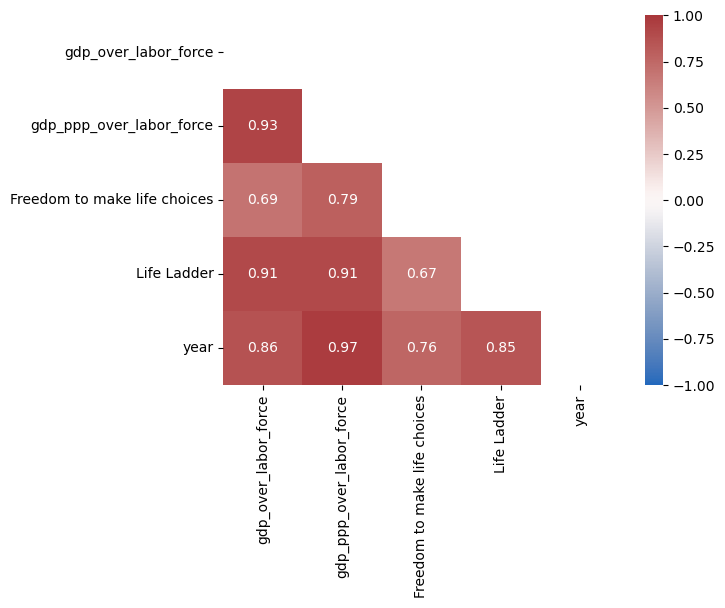

In [38]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Lithuania'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [293]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Luxembourg'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.265005 -0.168744
Life Ladder                       0.265005     1.000000  0.453449
year                             -0.168744     0.453449  1.000000

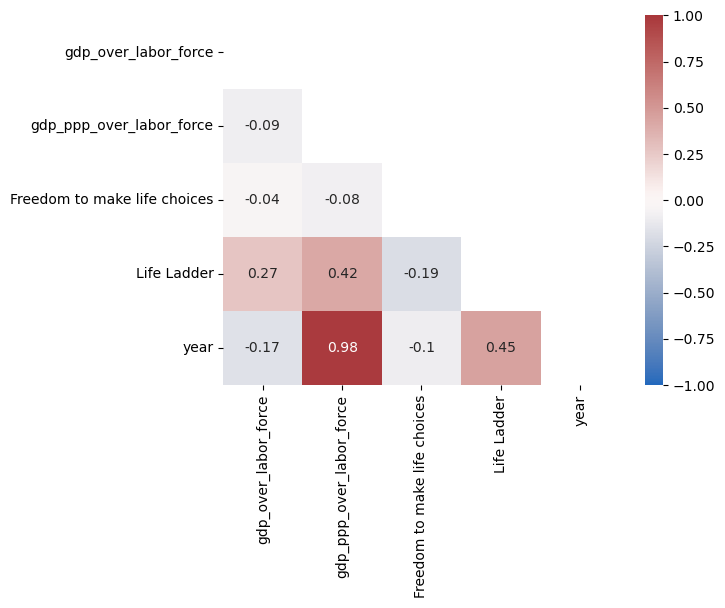

In [39]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Luxembourg'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [326]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Netherlands'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.169737 -0.106880
Life Ladder                       0.169737     1.000000 -0.459582
year                             -0.106880    -0.459582  1.000000

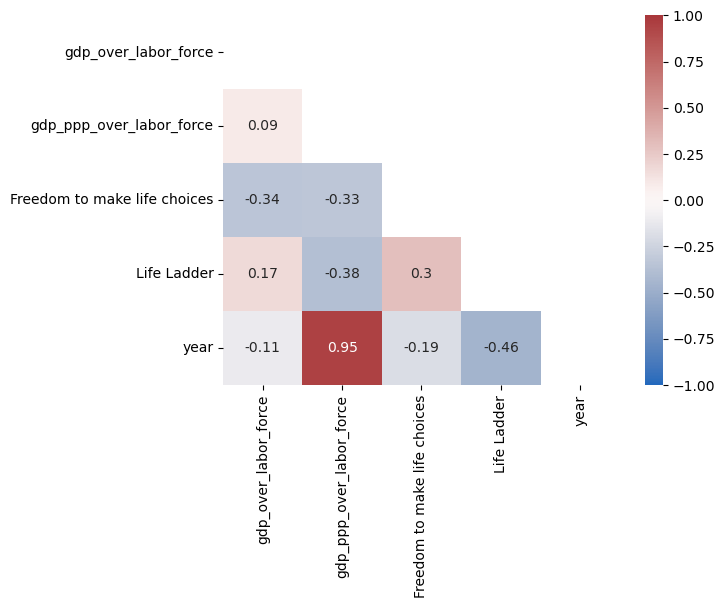

In [40]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Netherlands'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [325]:
HappinessAndGdp[HappinessAndGdp['country'] == 'New Zealand'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000    -0.622064  0.778046
Life Ladder                      -0.622064     1.000000 -0.614935
year                              0.778046    -0.614935  1.000000

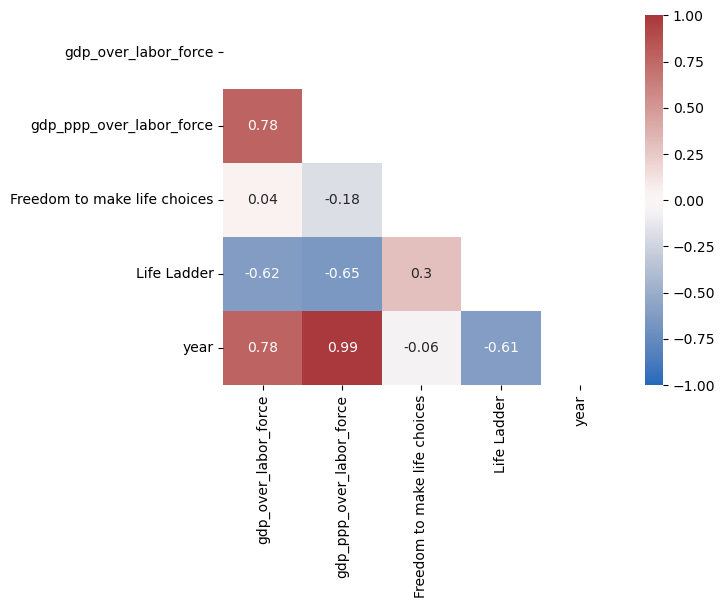

In [41]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'New Zealand'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [324]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Norway'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.011522 -0.251380
Life Ladder                       0.011522     1.000000 -0.815723
year                             -0.251380    -0.815723  1.000000

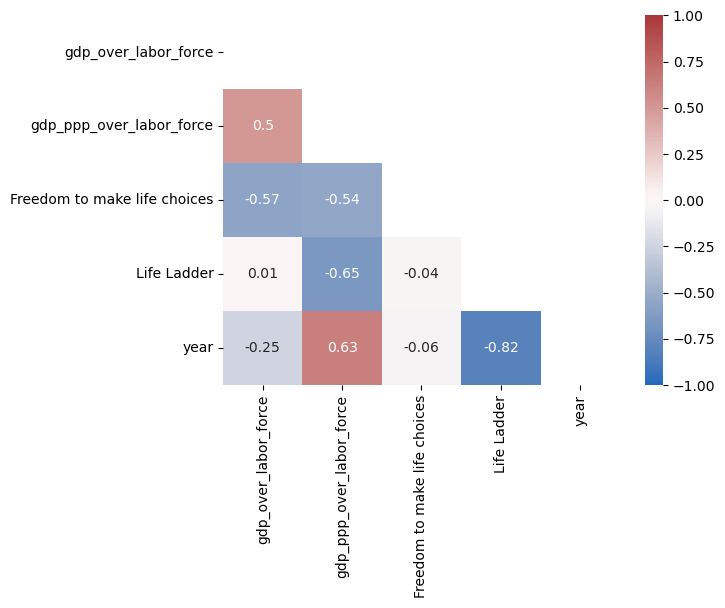

In [42]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Norway'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [48]:
# HappinessAndGdp[HappinessAndGdp['country'] == 'Norway']['GDP PPP per Worker'].max()
HappinessAndGdp[HappinessAndGdp['country'] == 'Norway']['GDP PPP per Worker'].min()

112035.31983024647

In [323]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Poland'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.570724  0.855823
Life Ladder                       0.570724     1.000000  0.747453
year                              0.855823     0.747453  1.000000

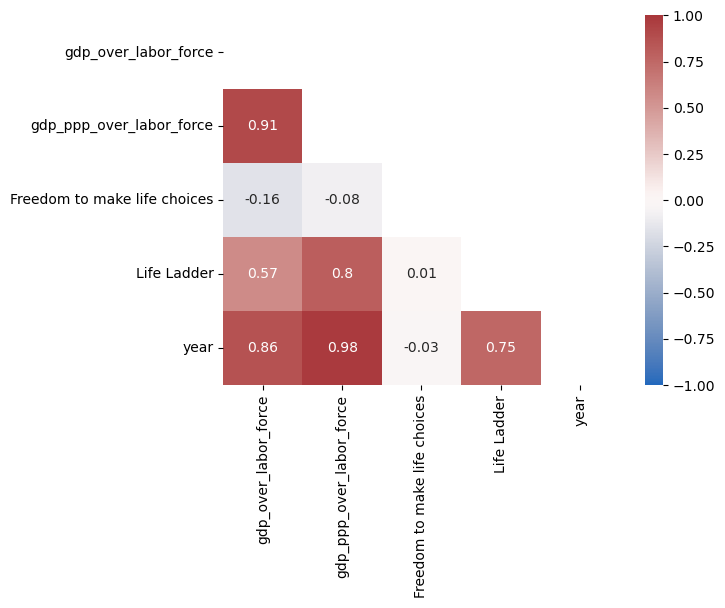

In [49]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Poland'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [273]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Portugal'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.720829  0.284999
Life Ladder                       0.720829     1.000000  0.707870
year                              0.284999     0.707870  1.000000

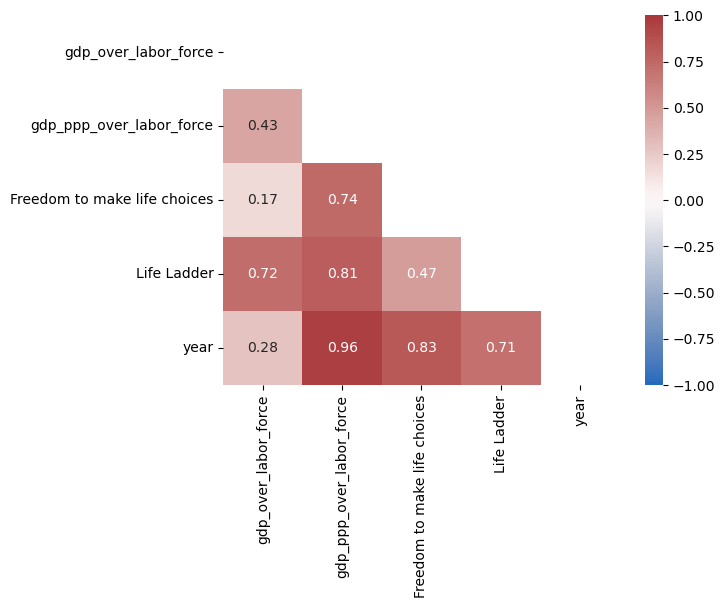

In [52]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Portugal'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [274]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Slovakia'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.559947  0.605553
Life Ladder                       0.559947     1.000000  0.844325
year                              0.605553     0.844325  1.000000

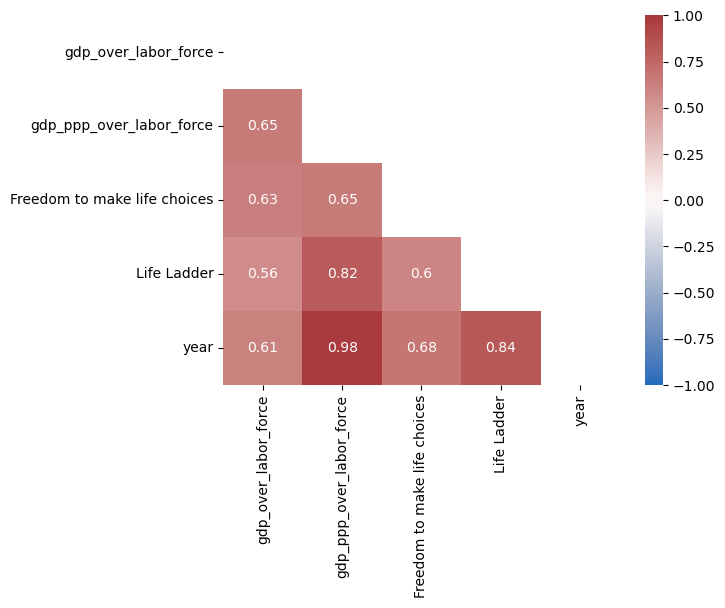

In [53]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Slovakia'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [275]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Slovenia'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.834426  0.676106
Life Ladder                       0.834426     1.000000  0.775072
year                              0.676106     0.775072  1.000000

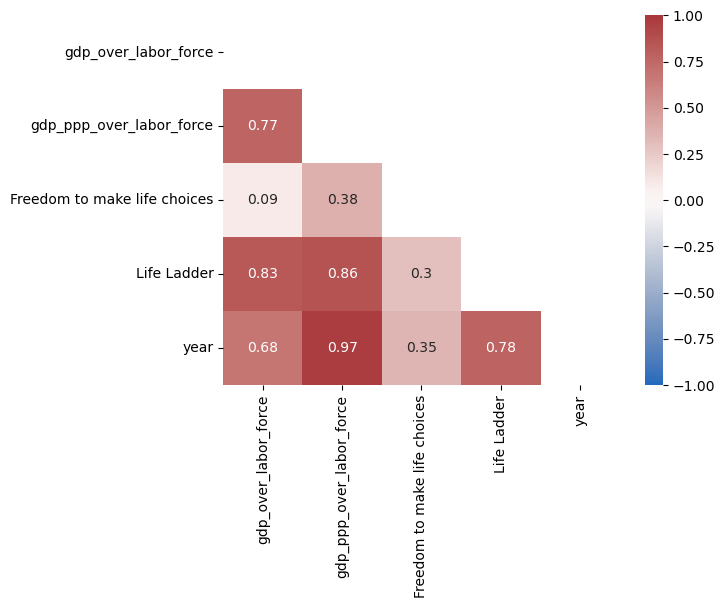

In [54]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Slovenia'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [276]:
HappinessAndGdp[HappinessAndGdp['country'] == 'South Korea'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.148603  0.895108
Life Ladder                       0.148603     1.000000  0.074318
year                              0.895108     0.074318  1.000000

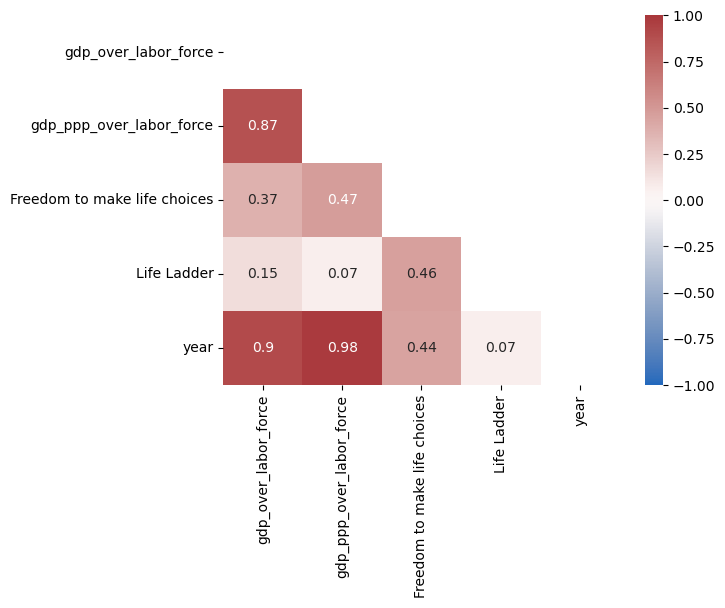

In [55]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'South Korea'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [322]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Spain'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_ppp_over_labor_force  Life Ladder      year
gdp_ppp_over_labor_force                  1.000000    -0.100096  0.897431
Life Ladder                              -0.100096     1.000000 -0.343841
year                                      0.897431    -0.343841  1.000000

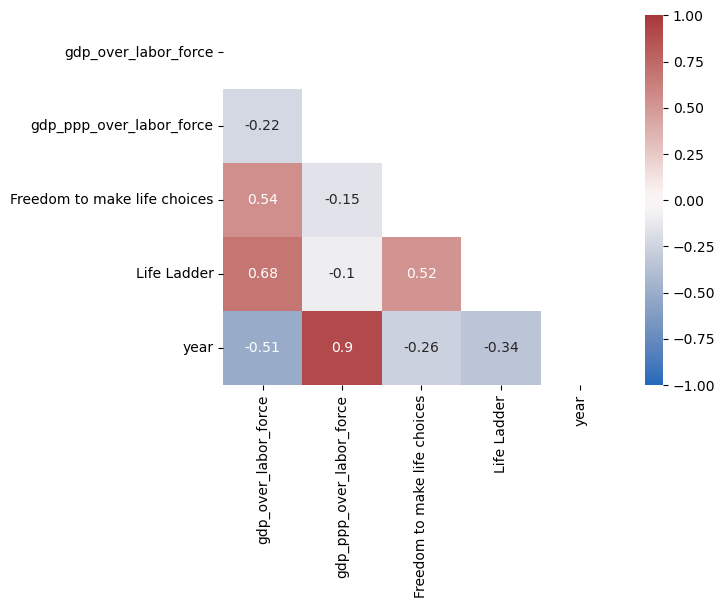

In [56]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Spain'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [321]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Sweden'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000     0.350030  0.078329
Life Ladder                       0.350030     1.000000 -0.004524
year                              0.078329    -0.004524  1.000000

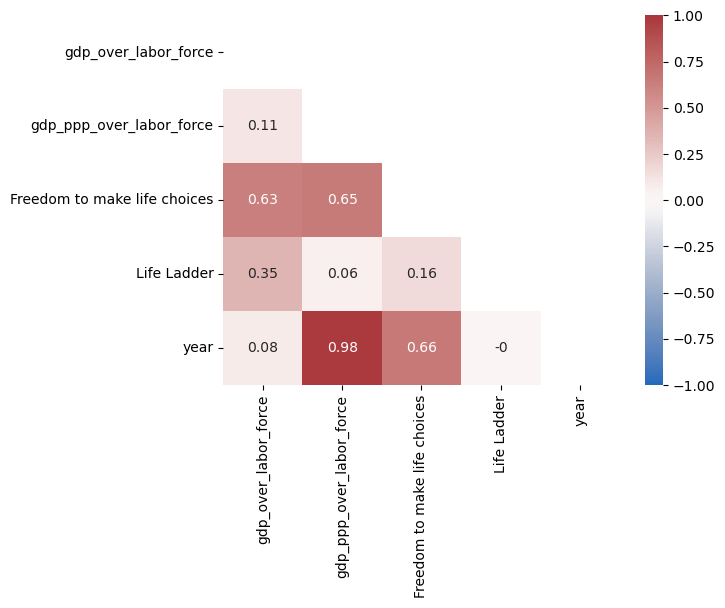

In [57]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Sweden'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [319]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force               1.00000    -0.466480  0.710610
Life Ladder                       -0.46648     1.000000 -0.564112
year                               0.71061    -0.564112  1.000000

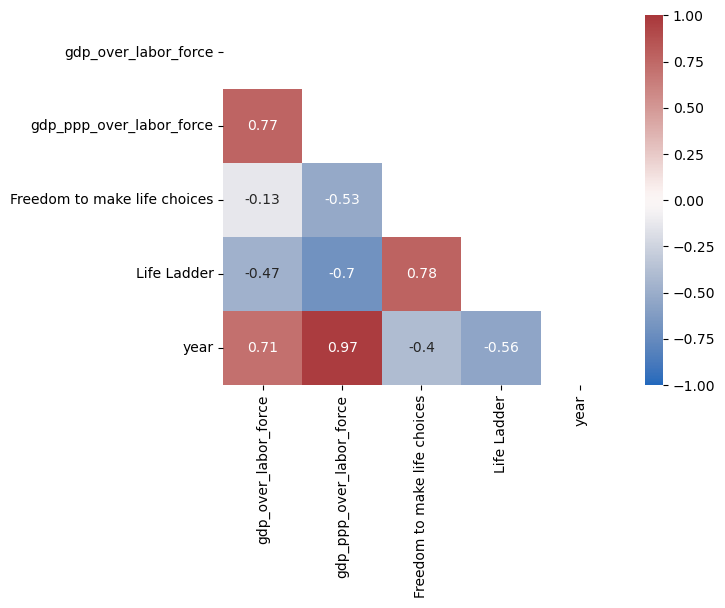

In [58]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [111]:
HappinessAndGdp[HappinessAndGdp['year'] == 2014].sort_values(by='Happiness Index', ascending=False).head(10)

year iso3c      country  gdp_over_labor_force  gdp_ppp_over_labor_force  \
198  2014   DNK      Denmark         123207.742339              94355.315430   
195  2014   CHE  Switzerland         153524.467513             109733.095090   
215  2014   NOR       Norway         184174.909702             125086.397902   
207  2014   ISR       Israel          82816.989580              75198.953159   
201  2014   FIN      Finland         102168.968761              84771.402033   
214  2014   NLD  Netherlands          98778.662060              91930.845758   
216  2014   NZL  New Zealand          81342.237639              68057.612917   
194  2014   CAN       Canada          92192.386848              82780.194868   
191  2014   AUS    Australia         119157.772291              89360.132120   
221  2014   SWE       Sweden         113397.211978              89146.581045   

     gdp_ppp_over_k_hours_worked_c  Life Ladder  Freedom to make life choices  
198                   74452.513280        7.508                         0.942  
195                   72602.497645        7.493                         0.949  
215                   83979.197127        7.444                         0.956  
207                   42428.947632        7.401                         0.707  
201                   62432.179251        7.385                         0.933  
214                   70759.893546        7.321                         0.910  
216                   44741.196530        7.306                         0.932  
194                   54613.531296        7.304                         0.939  
191                   53462.632958        7.289                         0.923  
221                   69649.888072        7.239                         0.945

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Corr value:  -0.5641123545487141  P value:  0.070661353644708019272613341854594182223081588745117187500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.08, 0.9, "Pearson's r = -0.40")

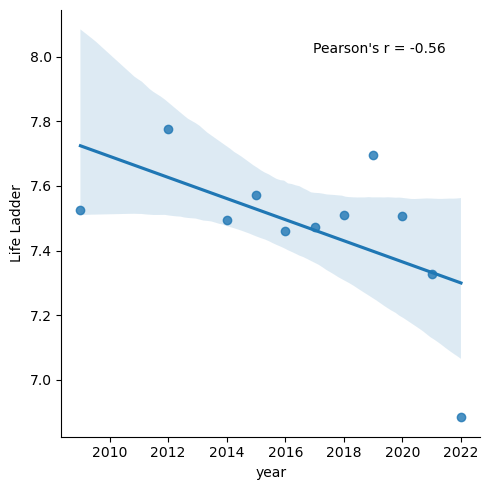

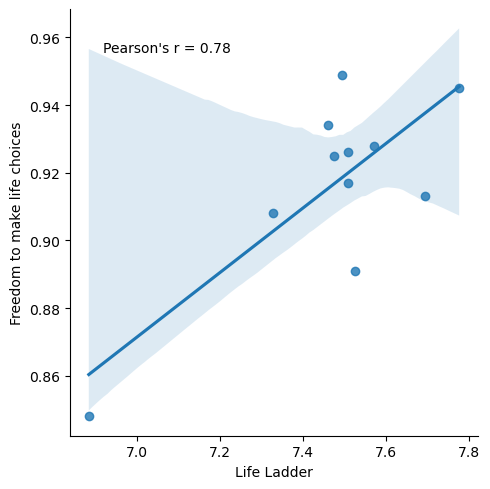

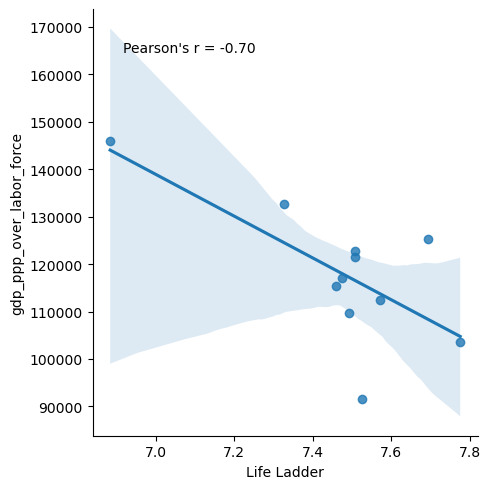

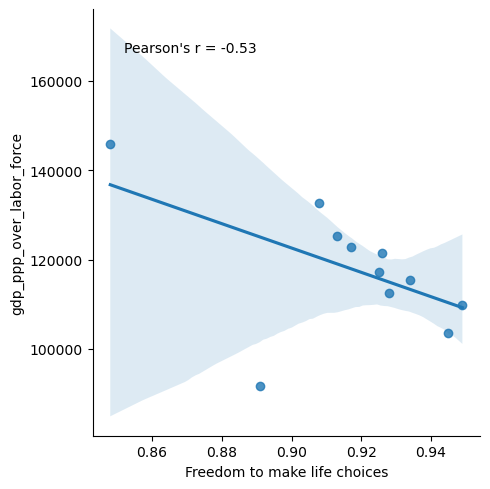

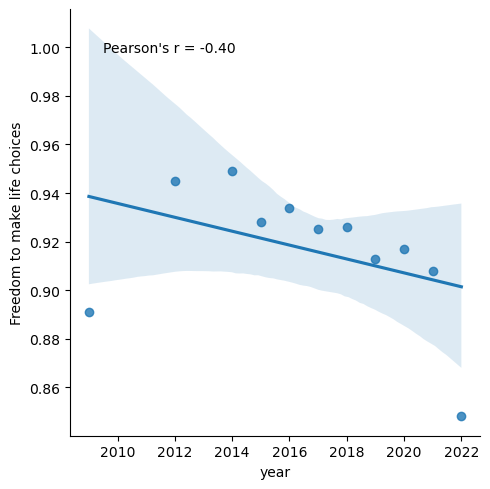

In [54]:
sns.lmplot(data=HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'], x='year', y='Happiness Index')
ax = plt.gca()
r = HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][['GDP per Worker', 'Happiness Index', 'year', 'GDP PPP per Worker']].corr().iloc[1,2]
HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][['GDP per Worker', 'Happiness Index', 'year', 'GDP PPP per Worker']].corr()
plt.text(.6, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

sns.lmplot(data=HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'], x='Happiness Index', y='Freedom to Make Life Choices')
ax = plt.gca()
r = HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][['GDP per Worker', 'Happiness Index', 'Freedom to Make Life Choices', 'GDP PPP per Worker']].corr().iloc[2,1]
plt.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)
corr, pvalue = scipy.stats.pearsonr(HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland']['year'], HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][ 'Happiness Index'])
print('Corr value: ', corr, ' P value: ', '{:0.300f}'.format(pvalue))

sns.lmplot(data=HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'], x='Happiness Index', y='GDP PPP per Worker')
ax = plt.gca()
r = HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][['GDP per Worker', 'Happiness Index', 'Freedom to Make Life Choices', 'GDP PPP per Worker']].corr().iloc[3,1]
plt.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

sns.lmplot(data=HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'], x='Freedom to Make Life Choices', y='GDP PPP per Worker')
ax = plt.gca()
r = HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][['GDP per Worker', 'Happiness Index', 'Freedom to Make Life Choices', 'GDP PPP per Worker']].corr().iloc[3,2]
plt.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

sns.lmplot(data=HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'], x='year', y='Freedom to Make Life Choices')
ax = plt.gca()
r = HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland'][['GDP per Worker', 'year', 'Freedom to Make Life Choices', 'GDP PPP per Worker']].corr().iloc[1,2]
plt.text(.08, .9, "Pearson's r = {:.2f}".format(r), transform=ax.transAxes)

In [98]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Portugal']

year iso3c   country  gdp_over_labor_force  gdp_ppp_over_labor_force  \
44   2008   PRT  Portugal          47584.538521              50858.930563   
92   2010   PRT  Portugal          43359.218745              52485.017353   
122  2011   PRT  Portugal          45151.762197              52059.923816   
155  2012   PRT  Portugal          40151.794758              51621.697567   
186  2013   PRT  Portugal          42810.857056              55232.761120   
218  2014   PRT  Portugal          43943.262302              57141.408058   
251  2015   PRT  Portugal          38315.443587              59037.096120   
284  2016   PRT  Portugal          39794.090191              62915.343838   
317  2017   PRT  Portugal          42349.816501              65119.111117   
349  2018   PRT  Portugal          46221.614555              68517.769355   
381  2019   PRT  Portugal          45589.718548              72884.889127   
413  2020   PRT  Portugal          44331.850427              69671.018421   
445  2021   PRT  Portugal          49102.437225              73135.273138   
478  2022   PRT  Portugal          47631.902812              81337.120926   

     gdp_ppp_over_k_hours_worked_c  Life Ladder  Freedom to make life choices  
44                    38532.876936        5.717                         0.646  
92                    39537.904548        5.095                         0.721  
122                   40125.058667        5.220                         0.875  
155                   40517.303534        4.994                         0.774  
186                   41103.095647        5.158                         0.788  
218                   40685.687494        5.127                         0.847  
251                   40677.245911        5.081                         0.800  
284                   40702.990532        5.447                         0.838  
317                   41034.349973        5.711                         0.905  
349                   40995.900776        5.920                         0.877  
381                   41617.019219        6.095                         0.882  
413                   42085.829660        5.768                         0.913  
445                   42508.056367        6.183                         0.892  
478                   44805.232401        5.953                         0.903

In [317]:
HappinessAndGdp[HappinessAndGdp['country'] == 'United Kingdom'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000    -0.338686 -0.106692
Life Ladder                      -0.338686     1.000000  0.013398
year                             -0.106692     0.013398  1.000000

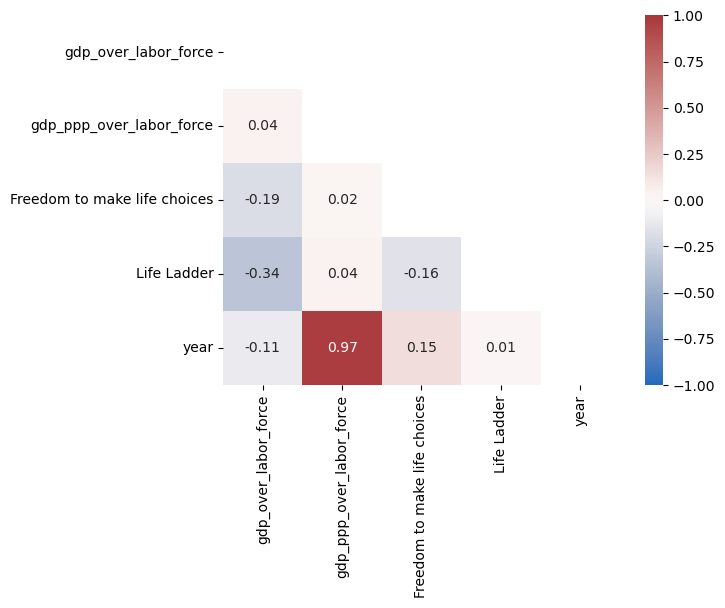

In [59]:
matrix = HappinessAndGdp[HappinessAndGdp['country'] == 'United Kingdom'][['GDP per Worker', 'GDP PPP per Worker', 
                                                                        'Freedom to Make Life Choices', 'Happiness Index', 'year']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [315]:
HappinessAndGdp[HappinessAndGdp['country'] == 'United States'][['GDP per Worker', 'Happiness Index', 'year']].corr()

gdp_over_labor_force  Life Ladder      year
gdp_over_labor_force              1.000000    -0.762711  0.971054
Life Ladder                      -0.762711     1.000000 -0.802162
year                              0.971054    -0.802162  1.000000

In [28]:
countrycodes = [
    'AUS', 'AUT', 'BEL', 'CAN', 'HRV', 
    'CZE', 'DNK', 'EST', 'FIN', 'FRA', 
    'DEU', 'GRC', 'HUN', 'ISL', 'ISR', 
    'ITA', 'JPN', 'KOR', 'LVA', 'LTU', 
    'LUX', 'NLD', 'NZL', 'NOR', 'POL', 
    'PRT', 'SVK', 'SVN', 'ESP', 'SWE', 
    'CHE', 'GBR', 'USA']

for index, code in enumerate(countrycodes):
    HapGdp = HappinessAndGdp[HappinessAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Happiness Index', 'Year']].corr().iloc[0,2].round(2)
    HapPpp = HappinessAndGdp[HappinessAndGdp['iso3c'] == code][['GDP per Worker', 'GDP PPP per Worker', 'Happiness Index', 'Year']].corr().iloc[1,2].round(2)
    if (HapGdp < -.74 or HapPpp < -.74):
        print(HappinessAndGdp[(HappinessAndGdp['iso3c'] == code) & (HappinessAndGdp['Year'] == 2012)]['country'])


127    Australia
Name: country, dtype: object
130    Canada
Name: country, dtype: object
159    United States
Name: country, dtype: object


In [29]:
HappinessAndGdp[HappinessAndGdp['iso3c'] == 'NOR']

Year iso3c country  GDP per Worker  GDP PPP per Worker  \
42   2008   NOR  Norway   178601.564209       113701.419126   
152  2012   NOR  Norway   191805.169184       123471.957133   
215  2014   NOR  Norway   184174.909702       125086.397902   
248  2015   NOR  Norway   140533.529992       114098.563557   
281  2016   NOR  Norway   133934.223596       112035.319830   
314  2017   NOR  Norway   145513.170423       123452.043917   
346  2018   NOR  Norway   157285.262649       133464.371031   
378  2019   NOR  Norway   144675.235452       132344.502633   
410  2020   NOR  Norway   129811.905977       123714.801706   
442  2021   NOR  Norway   168569.397648       152227.420742   
475  2022   NOR  Norway   194381.956347       210405.112684   

     PPP per Hour Worked  Happiness Index  Freedom to Make Life Choices  
42          82281.552124            7.632                         0.947  
152         82801.370634            7.678                         0.947  
215         83979.197127            7.444                         0.956  
248         85052.204912            7.603                         0.948  
281         85622.027071            7.596                         0.954  
314         87394.107609            7.579                         0.953  
346         86717.720211            7.444                         0.960  
378         86384.345003            7.442                         0.954  
410         87165.209246            7.290                         0.965  
442         88450.863349            7.362                         0.936  
475         87990.142428            7.295                         0.939

In [30]:
HappinessAndGdp[HappinessAndGdp['country'] == 'Switzerland']

Year iso3c      country  GDP per Worker  GDP PPP per Worker  \
48   2009   CHE  Switzerland   123766.515788        91613.061647   
131  2012   CHE  Switzerland   149550.147401       103562.330737   
195  2014   CHE  Switzerland   153524.467513       109733.095090   
227  2015   CHE  Switzerland   144467.821709       112505.651544   
260  2016   CHE  Switzerland   140779.229310       115413.659134   
293  2017   CHE  Switzerland   141286.911077       117134.797038   
326  2018   CHE  Switzerland   146391.145696       121434.227003   
358  2019   CHE  Switzerland   145115.317247       125357.896107   
390  2020   CHE  Switzerland   148582.611395       122831.057014   
422  2021   CHE  Switzerland   160743.743914       132765.078803   
454  2022   CHE  Switzerland   160753.802794       145912.647458   

     PPP per Hour Worked  Happiness Index  Freedom to Make Life Choices  
48          68764.633275            7.525                         0.891  
131         70590.124814            7.776                         0.945  
195         72602.497645            7.493                         0.949  
227         72123.195791            7.572                         0.928  
260         72586.227089            7.459                         0.934  
293         73750.387782            7.474                         0.925  
326         75452.530137            7.509                         0.926  
358         75871.489102            7.694                         0.913  
390         76939.681122            7.508                         0.917  
422         78231.356443            7.328                         0.908  
454         78838.774703            6.884                         0.848

In [31]:
# fig, axs = plt.subplots(33, 3)
# fig.set_figheight(110)
# fig.set_figwidth(15)
# for index, country in enumerate(HappinessAndGdp['country'].unique()):
#     x = 0
#     # Add country to plot
#     axs[index, x].scatter(HappinessAndGdp[HappinessAndGdp['country'] == country]['GDP per Worker'], HappinessAndGdp[HappinessAndGdp['country'] == country]['Happiness Index'])
#     axs[index, x].set_title(country)
#     x += 1
#     axs[index, x].scatter(HappinessAndGdp[HappinessAndGdp['country'] == country]['year'], HappinessAndGdp[HappinessAndGdp['country'] == country]['GDP per Worker'])
#     axs[index, x].set_title(country)
#     x += 1
#     axs[index, x].scatter(HappinessAndGdp[HappinessAndGdp['country'] == country]['year'], HappinessAndGdp[HappinessAndGdp['country'] == country]['Happiness Index'])
#     axs[index, x].set_title(country)


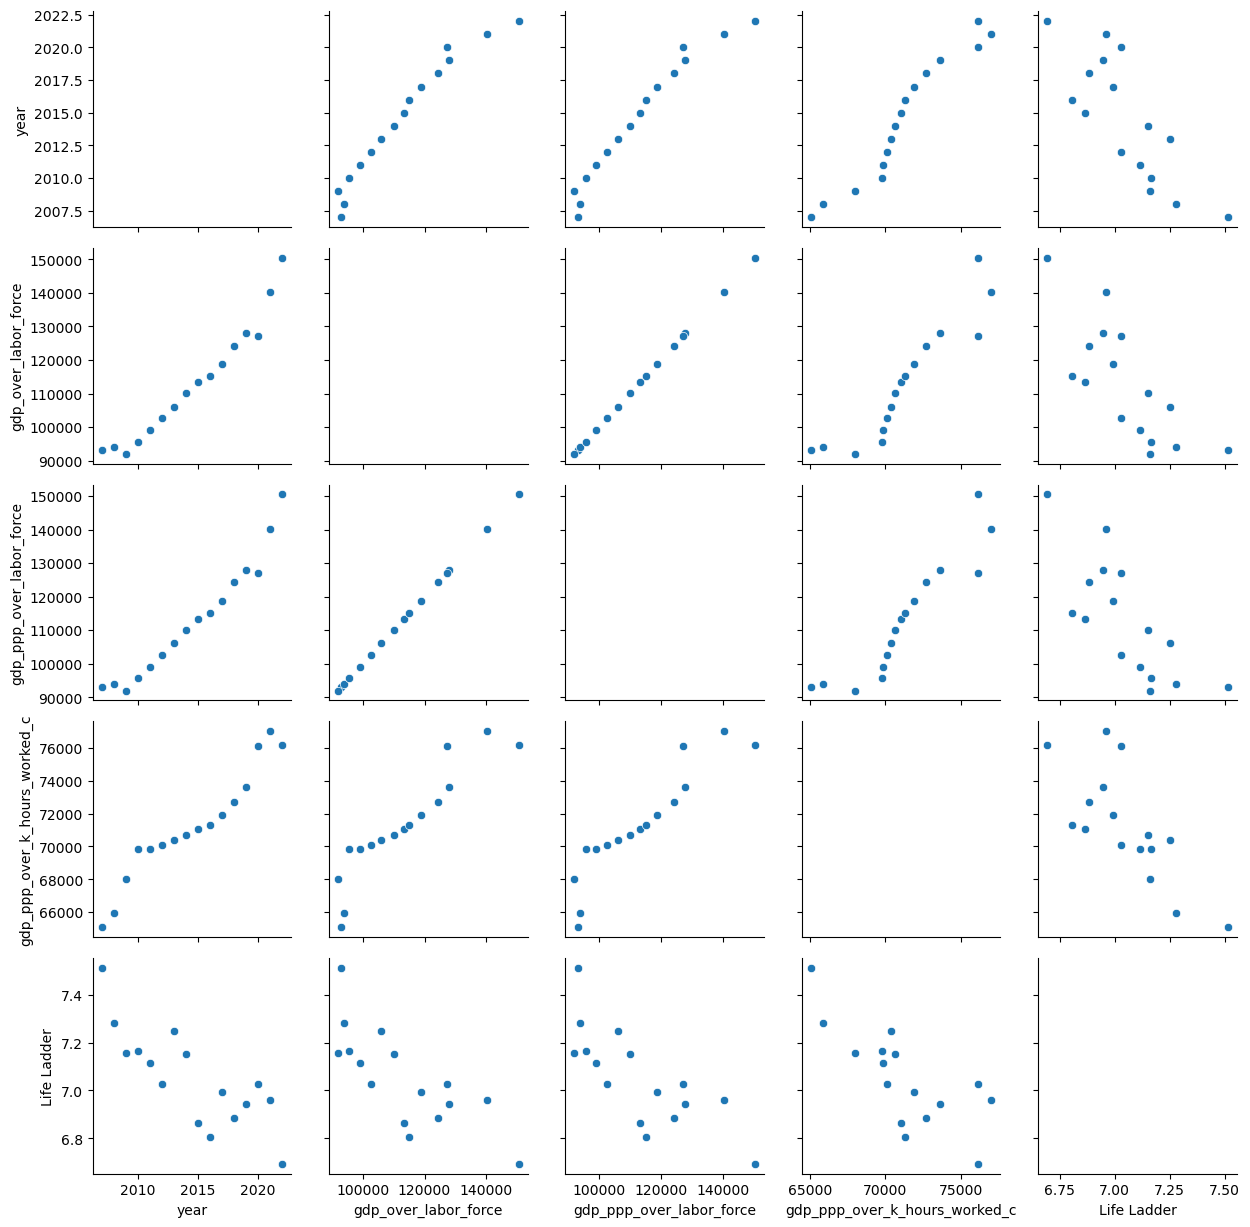

In [157]:
UsaHappAndGdp = HappinessAndGdp[HappinessAndGdp['iso3c'] == 'USA']
g = sns.PairGrid(data=UsaHappAndGdp)
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.scatterplot)
g = g.map_lower(sns.scatterplot)

In [56]:
AvgHappiness = pd.DataFrame(columns = ['country', 'iso3c', 'Avg Happiness Index'])
for index, code in enumerate(countryCodes):
    happMean = round(HappinessAndGdp[HappinessAndGdp['iso3c'] == code]['Happiness Index'].mean(), 2)
    newRow = pd.DataFrame([{'country':HappinessAndGdp[HappinessAndGdp['iso3c'] == code]['country'].unique()[0], 'iso3c':code, 'Avg Happiness Index':happMean}])
    AvgHappiness = pd.concat([AvgHappiness, newRow], ignore_index=True)

In [57]:
AvgHappiness.sort_values('Avg Happiness Index', ascending=False)

country iso3c  Avg Happiness Index
6          Denmark   DNK                 7.65
8          Finland   FIN                 7.62
23          Norway   NOR                 7.49
30     Switzerland   CHE                 7.47
13         Iceland   ISL                 7.46
21     Netherlands   NLD                 7.45
29          Sweden   SWE                 7.38
3           Canada   CAN                 7.32
22     New Zealand   NZL                 7.28
14          Israel   ISR                 7.27
0        Australia   AUS                 7.25
1          Austria   AUT                 7.22
20      Luxembourg   LUX                 7.06
32   United States   USA                 7.05
2          Belgium   BEL                 6.95
31  United Kingdom   GBR                 6.90
10         Germany   DEU                 6.84
5          Czechia   CZE                 6.64
9           France   FRA                 6.64
28           Spain   ESP                 6.46
15           Italy   ITA                 6.26
27        Slovenia   SVN                 6.17
26        Slovakia   SVK                 6.16
24          Poland   POL                 6.00
16           Japan   JPN                 6.00
19       Lithuania   LTU                 5.96
17     South Korea   KOR                 5.93
7          Estonia   EST                 5.76
4          Croatia   HRV                 5.67
18          Latvia   LVA                 5.58
11          Greece   GRC                 5.58
25        Portugal   PRT                 5.53
12         Hungary   HUN                 5.41

In [58]:
HappinessAndGdp[HappinessAndGdp['Year'] == 2022].sort_values('Happiness Index', ascending=False)

Year iso3c         country  GDP per Worker  GDP PPP per Worker  \
460  2022   FIN         Finland    99474.075112       116185.581863   
467  2022   ISR          Israel   119436.890276       108182.272666   
457  2022   DNK         Denmark   126239.605954       139474.255198   
466  2022   ISL         Iceland   118728.216514       112504.248763   
480  2022   SWE          Sweden   104619.645810       120919.625775   
474  2022   NLD     Netherlands   100156.000498       124471.632628   
475  2022   NOR          Norway   194381.956347       210405.112684   
472  2022   LUX      Luxembourg   243978.910717       274446.363413   
471  2022   LTU       Lithuania    46591.625817        90824.490086   
450  2022   AUS       Australia   118724.433418       115289.118520   
451  2022   AUT         Austria    98739.338466       128673.595631   
476  2022   NZL     New Zealand    83663.883242        90110.172910   
453  2022   CAN          Canada   100250.209671       106511.563739   
454  2022   CHE     Switzerland   160753.802794       145912.647458   
452  2022   BEL         Belgium   108138.030531       141821.760841   
479  2022   SVN        Slovenia    58579.010020        99492.983288   
462  2022   GBR  United Kingdom    89107.167167       106116.310388   
455  2022   CZE         Czechia    54678.533467        98809.965108   
481  2022   USA   United States   150462.830076       150462.830076   
477  2022   POL          Poland    37027.667633        87446.574569   
461  2022   FRA          France    87927.906825       119113.477889   
456  2022   DEU         Germany    91478.449844       119275.954363   
459  2022   EST         Estonia    52029.678076        85754.434797   
458  2022   ESP           Spain    58926.081381        92002.851882   
468  2022   ITA           Italy    78896.861457       119795.806140   
469  2022   JPN           Japan    61381.982517        82724.172431   
473  2022   LVA          Latvia    42364.259558        77465.849381   
478  2022   PRT        Portugal    47631.902812        81337.120926   
470  2022   KOR     South Korea    57022.262544        88517.372003   
463  2022   GRC          Greece    46603.057191        82800.177515   
465  2022   HUN         Hungary    36143.144911        82035.488187   
464  2022   HRV         Croatia    41089.713742        90108.289014   

     PPP per Hour Worked  Happiness Index  Freedom to Make Life Choices  
460         66611.368501            7.729                         0.959  
467         49863.467644            7.662                         0.775  
457         81223.733351            7.545                         0.930  
466         69026.323406            7.449                         0.936  
480         76795.931188            7.431                         0.939  
474         71632.337334            7.390                         0.868  
475         87990.142428            7.295                         0.939  
472        101555.078126            7.228                         0.915  
471         47524.870085            7.038                         0.710  
450         56060.627409            7.035                         0.854  
451         75494.746676            6.999                         0.856  
476         46911.965924            6.975                         0.831  
453         56688.258465            6.918                         0.838  
454         78838.774703            6.884                         0.848  
452         79863.425726            6.857                         0.890  
479         50930.025561            6.723                         0.930  
462         62535.053068            6.722                         0.857  
455         45876.082414            6.695                         0.908  
481         76150.654655            6.693                         0.736  
477         45112.670255            6.666                         0.800  
461         69656.848125            6.614                         0.798  
456         73730.332441         

In [32]:
# Positive Correlation Countries
positiveCountries1 = [
    'Czechia', 'Estonia', 'Hungary', 'Lithuania', 'Latvia', 'Poland', 'Finland', 'Slovenia', 'Slovakia'
]
positiveCountries2 =['Finland']

HappAndGdpPositiveCountries1 = HappinessAndGdp[HappinessAndGdp['country'].isin(positiveCountries1)]
HappAndGdpPositiveCountries2 = HappinessAndGdp[HappinessAndGdp['country'].isin(positiveCountries2)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


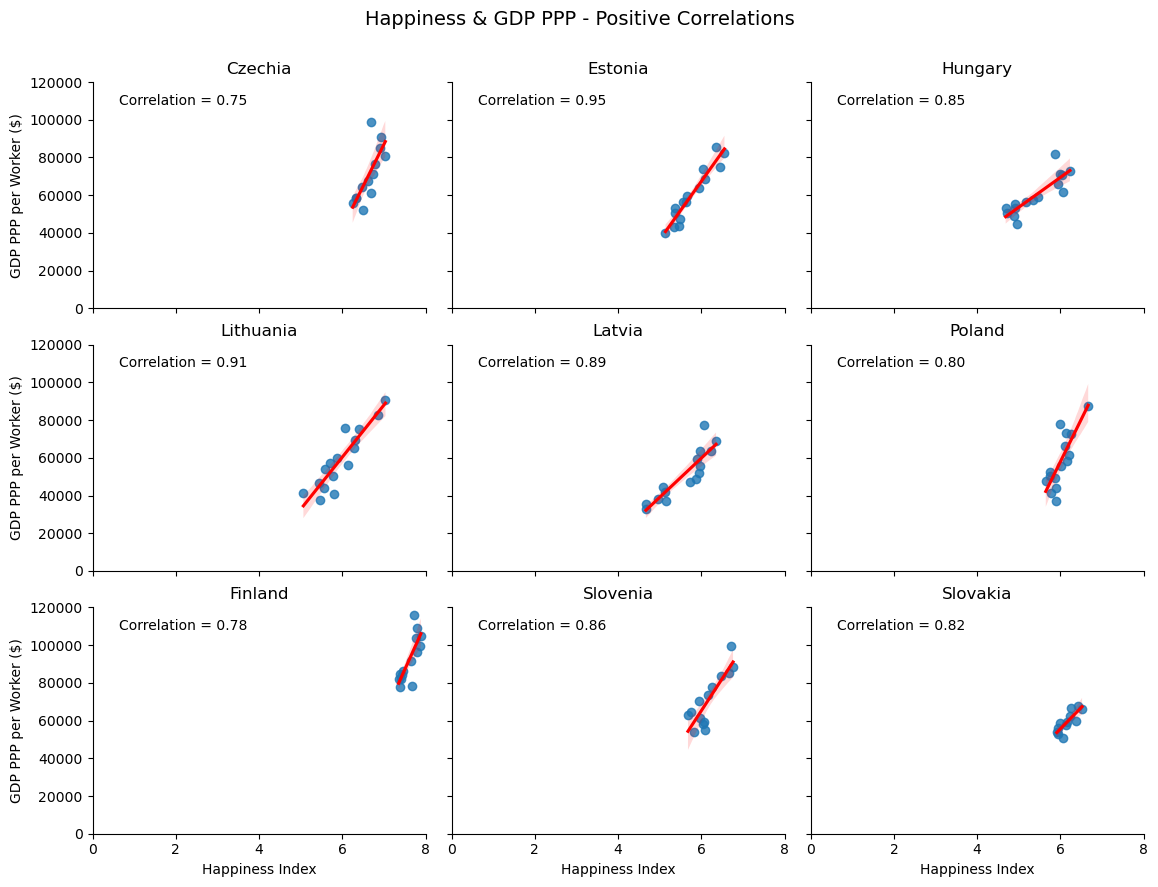

In [33]:
def annotate(data, **kws):
    r = data[['GDP PPP per Worker', 'Happiness Index']].corr().iloc[1,0]
    ax = plt.gca()
    ax.text(.08, .9, "Correlation = {:.2f}".format(r), transform=ax.transAxes)

g = sns.FacetGrid(data=HappAndGdpPositiveCountries1, col='country', col_wrap=3, height=3, aspect=1.3)
g.map_dataframe(sns.regplot, x='Happiness Index', y='GDP PPP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotate)
plt.xlim([0, 8])
plt.ylim([0, 120000])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(positiveCountries1[i])
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.subplots_adjust(top=0.9)
g.figure.suptitle('Happiness & GDP PPP - Positive Correlations', fontsize=14)
g.savefig('HappinessAndGdp_PositiveCorrRegPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


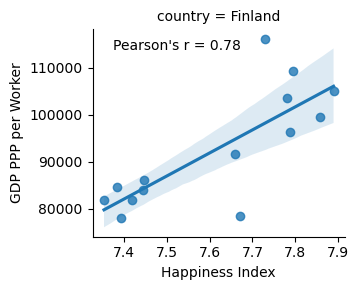

In [61]:
g = sns.FacetGrid(data=HappAndGdpPositiveCountries2, col='country', col_wrap=3)
g.map_dataframe(sns.regplot, x='Happiness Index', y='GDP PPP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotate)
g.savefig('HappinessAndGdp_FinRegPlot.png', dpi=300)

In [35]:
negativeCountries = ['Australia', 'Canada', 'United States']
HappAndGdpNegativeCountries = HappinessAndGdp[HappinessAndGdp['country'].isin(negativeCountries)]

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


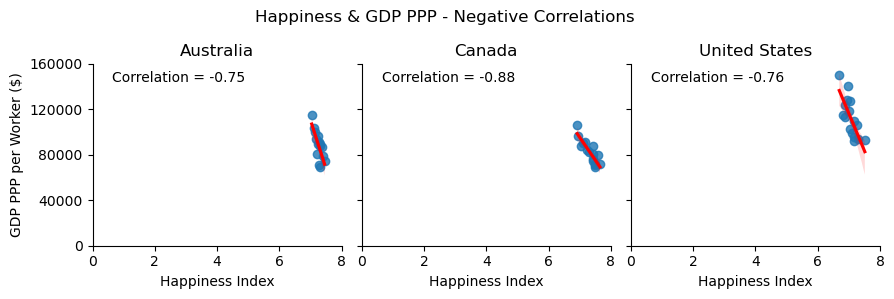

In [36]:
g = sns.FacetGrid(data=HappAndGdpNegativeCountries, col='country', col_wrap=3)
g.map_dataframe(sns.regplot, x='Happiness Index', y='GDP PPP per Worker', line_kws={"color": "red"})
g.map_dataframe(annotate)
plt.xlim([0, 8])
plt.ylim([0, 160000])
plt.yticks([0, 40000, 80000, 120000, 160000])
g.figure.subplots_adjust(top=.8)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(negativeCountries[i])
    ax.set_xlabel("Happiness Index")
    ax.set_ylabel("GDP PPP per Worker ($)")

g.figure.suptitle('Happiness & GDP PPP - Negative Correlations', fontsize=12)
g.savefig('HappinessAndGdp_NegCorrRegPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


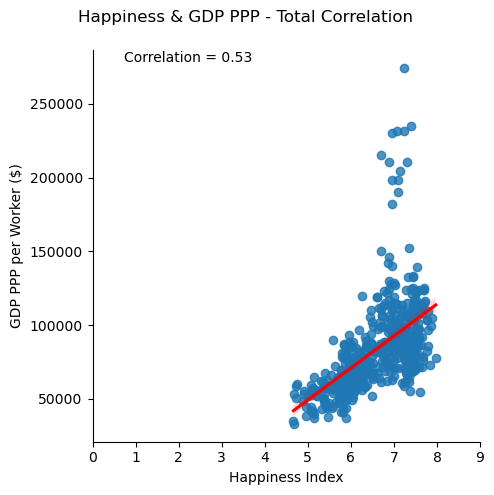

In [37]:
ChoicesAndHapp = HappinessAndGdp[['Happiness Index', 'Freedom to Make Life Choices']]
g = sns.lmplot(data=HappinessAndGdp, x='Happiness Index', y='GDP PPP per Worker', line_kws={"color": "red"})
ax = plt.gca()
r = HappinessAndGdp[['GDP PPP per Worker', 'Happiness Index']].corr().iloc[1,0]
plt.text(.08, .97, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.xlim([0, 9])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlabel("Happiness Index")
    ax.set_ylabel("GDP PPP per Worker ($)")
    
g.figure.subplots_adjust(top=.9)
g.figure.suptitle('Happiness & GDP PPP - Total Correlation', fontsize=12)
g.savefig('HappinessAndGdpPPP_TotalCorrelationPlot.png', dpi=300)

/Users/ethanreese/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


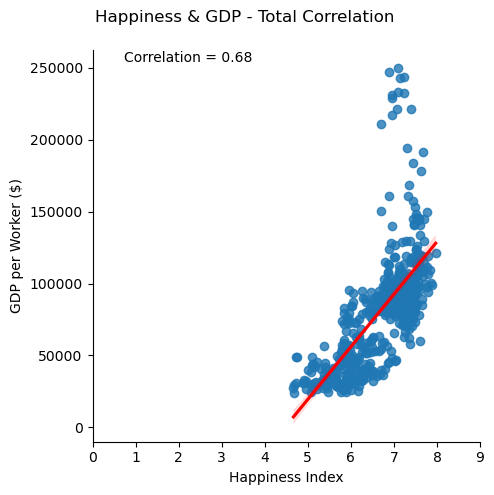

In [38]:
ChoicesAndHapp = HappinessAndGdp[['Happiness Index', 'Freedom to Make Life Choices']]
g = sns.lmplot(data=HappinessAndGdp, x='Happiness Index', y='GDP per Worker', line_kws={"color": "red"})
ax = plt.gca()
r = HappinessAndGdp[['GDP per Worker', 'Happiness Index']].corr().iloc[1,0]
plt.text(.08, .97, "Correlation = {:.2f}".format(r), transform=ax.transAxes)
plt.xlim([0, 9])

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlabel("Happiness Index")
    ax.set_ylabel("GDP per Worker ($)")

g.figure.subplots_adjust(top=.9)
g.figure.suptitle('Happiness & GDP - Total Correlation', fontsize=12)
g.savefig('HappinessAndGdp_TotalCorrelationPlot.png', dpi=300)